<h1 style='color:purple' align='center'>Data Science Project:4  Predicting mobile phones features extraction </h1>

In [1]:
#Libarariry import 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns',None)                        
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

<h1 style='color:blue' align='center'>Data Load : loaded mobile phone prices into a dataframe</h1>

In [2]:
df = pd.read_csv("Processed_Flipdata - Processed_Flipdata.csv")
df

Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

    Rear Camera Front Camera  AI Lens  Mobile Height  \
0          13MP          5MP        1          16.76   
1          13MP          5MP        1          16.76   
2          50MP         16MP        0          16.64   
3           8MP          5MP        0          16.56   
4          50MP          5MP        1          16.76   
..          ...          ...      ...            ...   
536        50MP         12MP        0          15.49   
537         5MP          2MP        0          12.70   
538        50MP          8MP        0          16.76   
539        50MP         32MP        0          16.26   
540        50MP          8MP        0          16.66   

                      Processor_   Prize  
0     Unisoc Spreadtrum SC9863A1   7,299  
1     Unisoc Spreadtrum SC9863A1   7,299  
2        Qualcomm Snapdragon 680  11,999  
3             Mediatek Helio A22   5,649  
4                            G37   8,999  
..                           ...     ...  
536  Qualcomm Snapdragon 8 Gen 2  79,999  
537                    Octa Core   5,998  
538           MediaTek Helio G35   9,990  
539      Exynos 1380, Octa Core   38,999  
540           Mediatek Helio G35  15,999  

[541 rows x 12 columns]

In [3]:
df.shape

(541, 12)

In [4]:
df.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [5]:
df.tail()

Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

    Rear Camera Front Camera  AI Lens  Mobile Height  \
536        50MP         12MP        0          15.49   
537         5MP          2MP        0          12.70   
538        50MP          8MP        0          16.76   
539        50MP         32MP        0          16.26   
540        50MP          8MP        0          16.66   

                      Processor_   Prize  
536  Qualcomm Snapdragon 8 Gen 2  79,999  
537                    Octa Core   5,998  
538           MediaTek Helio G35   9,990  
539      Exynos 1380, Octa Core   38,999  
540           Mediatek Helio G35  15,999

<h2 style='color:blue'>Data Cleaning: Handle NA values// Data Preprocessing</h2>

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
536    False
537    False
538    False
539    False
540    False
Length: 541, dtype: bool

In [7]:
df.info

<bound method DataFrame.info of      Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000

In [6]:
df.isnull().sum().iloc[0:12]

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [9]:
df.all()

Unnamed: 0       False
Model             True
Colour            True
Memory            True
RAM               True
Battery_          True
Rear Camera       True
Front Camera      True
AI Lens          False
Mobile Height     True
Processor_        True
Prize             True
dtype: bool

In [7]:
df.describe().T

count         mean         std    min      25%      50%  \
Memory         541.0   110.550832   60.600694   16.0    64.00   128.00   
RAM            541.0     5.397412    1.984923    2.0     4.00     6.00   
Battery_       541.0  4871.587800  780.148862  800.0  5000.00  5000.00   
AI Lens        541.0     0.062847    0.242911    0.0     0.00     0.00   
Mobile Height  541.0    16.431201    2.523553    4.5    16.51    16.71   

                   75%      max  
Memory          128.00   256.00  
RAM               8.00     8.00  
Battery_       5000.00  7000.00  
AI Lens           0.00     1.00  
Mobile Height    16.94    41.94

In [8]:
df.describe(exclude=['number']).T
#Exclede number column and summarize the categorical column.

count unique                      top freq
Model          541    187                 vivo Y16    9
Colour         541    275                   Yellow   12
Rear Camera    541     14                     50MP  260
Front Camera   541     13                     16MP  164
Processor_     541    123  Qualcomm Snapdragon 680   33
Prize          541    158                   15,999   23

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.head(3)

Model        Colour  Memory  RAM  Battery_ Rear Camera  \
0  Infinix SMART 7   Night Black      64    4      6000        13MP   
1  Infinix SMART 7    Azure Blue      64    4      6000        13MP   
2     MOTOROLA G32  Mineral Gray     128    8      5000        50MP   

  Front Camera  AI Lens  Mobile Height                  Processor_   Prize  
0          5MP        1          16.76  Unisoc Spreadtrum SC9863A1   7,299  
1          5MP        1          16.76  Unisoc Spreadtrum SC9863A1   7,299  
2         16MP        0          16.64     Qualcomm Snapdragon 680  11,999

In [200]:
df.duplicated().sum()

10

In [9]:
df.nunique()

Model            187
Colour           275
Memory             5
RAM                5
Battery_          37
Rear Camera       14
Front Camera      13
AI Lens            2
Mobile Height     38
Processor_       123
Prize            158
dtype: int64

In [10]:
df.dtypes

Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object

In [11]:
missing_row = df[df['Prize'].isnull()]
print(missing_row)

Empty DataFrame
Columns: [Model, Colour, Memory, RAM, Battery_, Rear Camera, Front Camera, AI Lens, Mobile Height, Processor_, Prize]
Index: []


In [12]:
df['Prize']=df['Prize'].astype(str).str.replace(',','').astype(float).astype('Int64')

In [13]:
df['Prize'] = df['Prize'].fillna(df['Prize'].median())

In [14]:
df.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [15]:
float_cols = ['Memory','RAM','Battery_','Mobile Height','Prize']
df[float_cols]=df[float_cols].astype(int)

In [16]:
df.dtypes

Model            object
Colour           object
Memory            int32
RAM               int32
Battery_          int32
Rear Camera      object
Front Camera     object
AI Lens           int64
Mobile Height     int32
Processor_       object
Prize             int32
dtype: object

**EDA**

**Dividinf the Columns into Numerical columns  /// categorical columns**

   ** 1. Numerical column**

In [17]:
numerical_col=df.select_dtypes(include=['int']).columns
numerical_col

Index(['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize'], dtype='object')

<Axes: ylabel='count'>

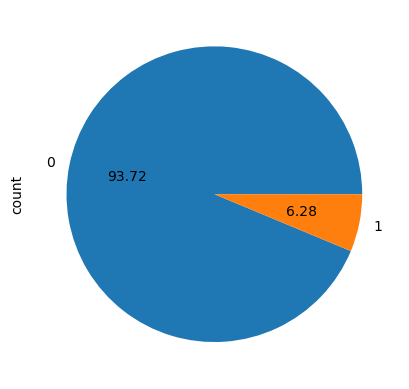

In [18]:
df['AI Lens'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

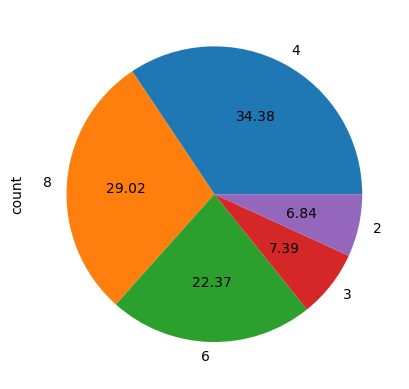

In [25]:
df['RAM'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

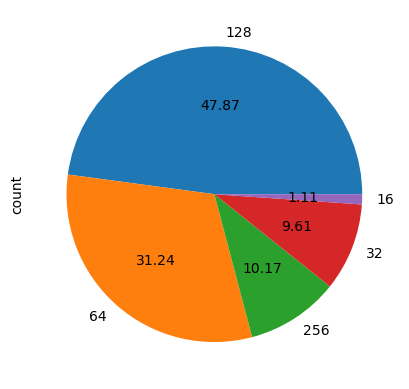

In [26]:
df['Memory'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Battery_'>

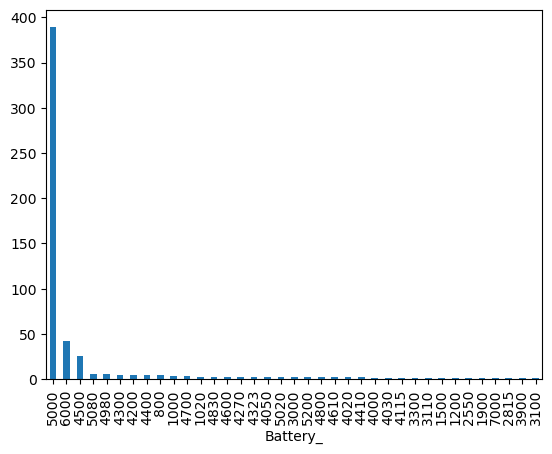

In [27]:
df['Battery_'].value_counts().plot(kind='bar')

In [28]:
print("The numerical col:",len(numerical_col))

The numerical col: 6


**Numerical columns are divided into 2 type 
**1. Discrete**
**2. Continous**

In [29]:
#numerical_col=df.select.dtypes(include=['float64','int64']).columns
#print("the Discrete feature count:",Len(discrete_feature))

In [30]:
#numerical_col = df1.select_dtypes(inclue=['float64','int64']).columns
#print("Continous features count:",Len(countinous_features))

**2.Catagorical columns**

In [19]:
Categorical_col= df.select_dtypes(include=['object','float64'])
Categorical_col

Model          Colour Rear Camera Front Camera  \
0          Infinix SMART 7     Night Black        13MP          5MP   
1          Infinix SMART 7      Azure Blue        13MP          5MP   
2             MOTOROLA G32    Mineral Gray        50MP         16MP   
3                 POCO C50      Royal Blue         8MP          5MP   
4          Infinix HOT 30i        Marigold        50MP          5MP   
..                     ...             ...         ...          ...   
536  SAMSUNG Galaxy S23 5G           Cream        50MP         12MP   
537               LAVA Z21            Cyan         5MP          2MP   
538         Tecno Spark 8T  Turquoise Cyan        50MP          8MP   
539  SAMSUNG Galaxy A54 5G    Awesome Lime        50MP         32MP   
540               OPPO A77        Sky Blue        50MP          8MP   

                      Processor_  
0     Unisoc Spreadtrum SC9863A1  
1     Unisoc Spreadtrum SC9863A1  
2        Qualcomm Snapdragon 680  
3             Mediatek Helio A22  
4                            G37  
..                           ...  
536  Qualcomm Snapdragon 8 Gen 2  
537                    Octa Core  
538           MediaTek Helio G35  
539      Exynos 1380, Octa Core   
540           Mediatek Helio G35  

[541 rows x 5 columns]

(-1.0999997875387297,
 1.099999902305174,
 -1.0999999551079491,
 1.0999999978622834)

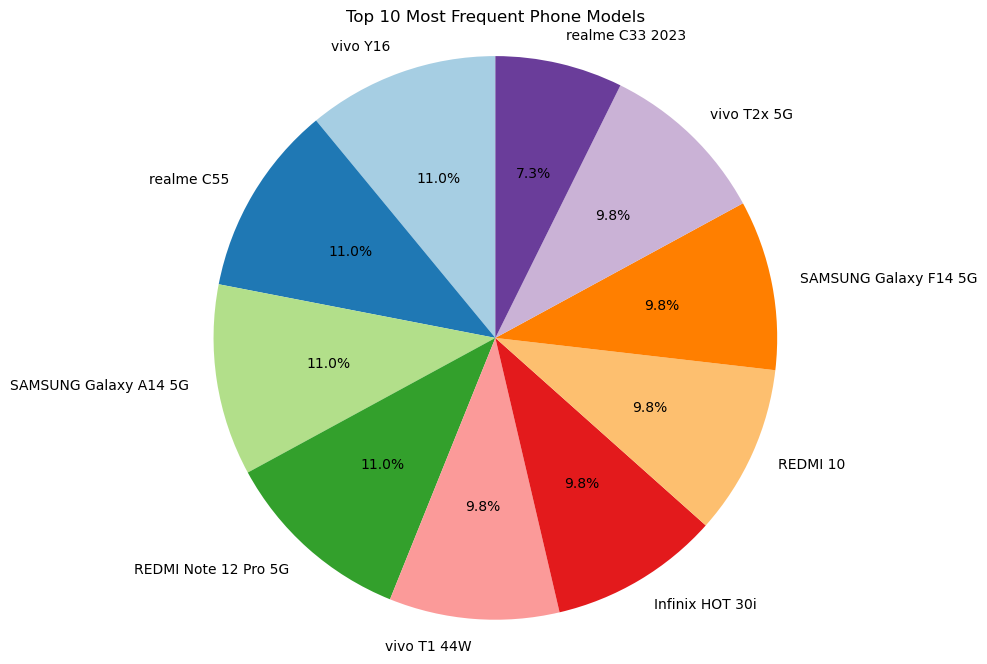

In [37]:
# Count the frequency of each model in the 'Model' column
model_counts = df['Model'].value_counts()

# Get the top 10 most frequent models
top_models = model_counts.head(10)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_models, labels=top_models.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 10 Most Frequent Phone Models')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.




<h1>
Insight from the Top 10 Most Frequency Phone Models

# 1. Popular Phone Models:

. The most frequnt phone models in the dataset include **realme c55 , SAMSUNG Dalaxy A14 5G, and REDMI Note 12 pro 5G,,** each contributing 11.0 % of the total
. other frequently occuring models includes **Vivo T1 44W, Infinix Hot Galaxy F14 5G,** each with 9.8% 
# 2. Brand Representation:
Samsung, Realme, and Vivo are the dominant brands in the presence in the market.

Readmi and infinix also have notable dipresentation.

# 3. Market Distribution:
the top 10 phone models account for a significant that these models, suggesting that these models, suggesting widely availabe and in demand
. the disrribution is relativey balanced , with no single model overwhelmingly dominating the market.
# conclusion:
the dataset includes a mix of budget and mid-range smartphones, with realme, samsung and vivo leading interms of frequency.

**Value count**

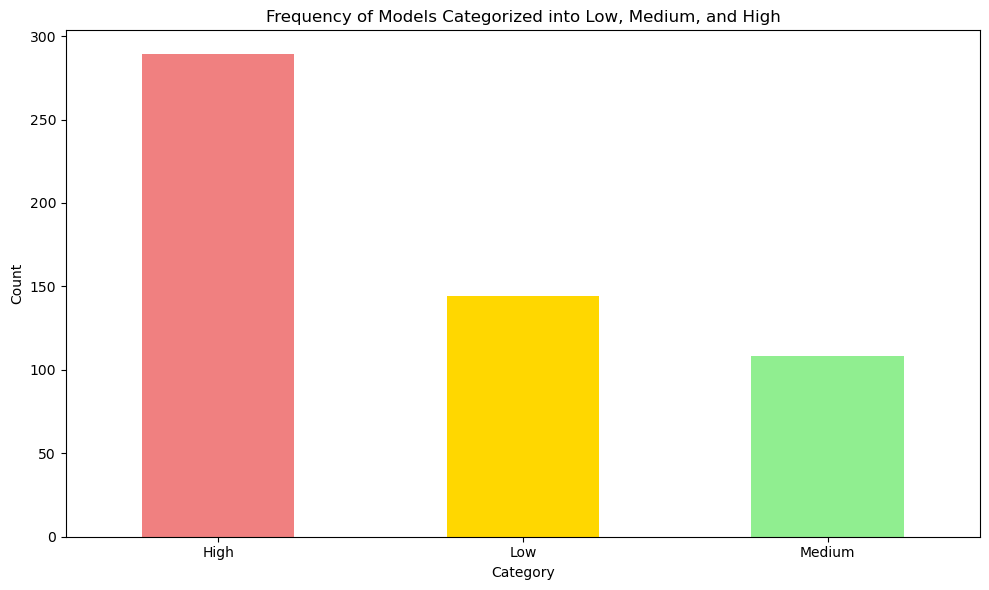

                       Count Category
Model                                
vivo Y16                   9     High
realme C55                 9     High
SAMSUNG Galaxy A14 5G      9     High
REDMI Note 12 Pro 5G       9     High
vivo T1 44W                8     High
...                      ...      ...
vivo Y1s                   1      Low
OnePlus Nord               1      Low
Micromax 3                 1      Low
vivo Y33s                  1      Low
OPPO A77                   1      Low

[187 rows x 2 columns]


In [13]:
# Step 1: Get the count of each unique model
Model_counts = df['Model'].value_counts()

# Step 2: Define thresholds for categorization using quantiles
low_threshold = Model_counts.quantile(0.33)  # Lower third
high_threshold = Model_counts.quantile(0.66)  # Upper third

# Step 3: Categorize the models based on their frequency
def categorize(count):
    if count <= low_threshold:
        return 'Low'
    elif count <= high_threshold:
        return 'Medium'
    else:
        return 'High'

# Step 4: Apply categorization
Model_categories = Model_counts.apply(categorize)

# Step 5: Create a DataFrame to show the model counts and their categories
categorized_counts = pd.DataFrame({
    'Count': Model_counts,
    'Category': Model_categories
})

# Step 6: Plotting the categorized data
plt.figure(figsize=(10, 6))
categorized_counts['Count'].groupby(categorized_counts['Category']).sum().plot(kind='bar', color=['lightcoral', 'gold', 'lightgreen'])
plt.title('Frequency of Models Categorized into Low, Medium, and High')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

# Step 7: If you want to see the categorized data
print(categorized_counts)



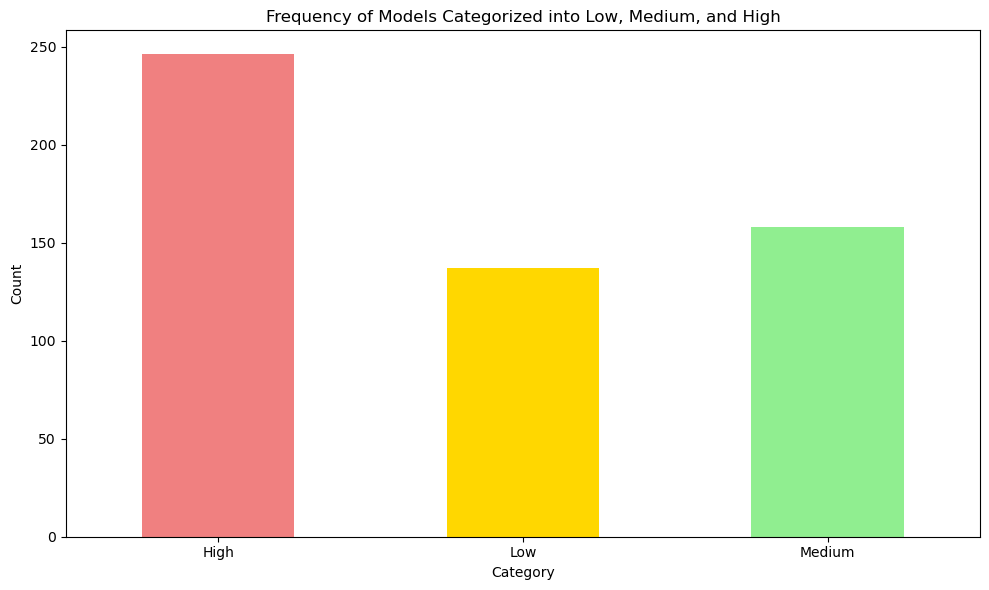

                Count Category
Colour                        
Yellow             12     High
Royal Blue          8     High
Power Black         8     High
Black               8     High
Midnight Black      7     High
...               ...      ...
Polar Blue          1      Low
Cosmic grey         1      Low
Sea                 1      Low
Infinity Black      1      Low
Sky Blue            1      Low

[275 rows x 2 columns]


In [14]:
# Assuming df is your DataFrame and 'Model' is the column of interest
Colour_counts = df['Colour'].value_counts()

# Define thresholds (these can be adjusted based on your data)
low_threshold = Colour_counts.quantile(0.33)  # Lower third
high_threshold = Colour_counts.quantile(0.66)  # Upper third

# Categorizing the models
def categorize(count):
    if count <= low_threshold:
        return 'Low'
    elif count <= high_threshold:
        return 'Medium'
    else:
        return 'High'

Colour_categories = Colour_counts.apply(categorize)

# Create a new DataFrame to show model counts and their categories
categorized_counts = pd.DataFrame({
    'Count': Colour_counts,
    'Category':Colour_categories
})

# Plotting the categorized data
plt.figure(figsize=(10,6))
categorized_counts['Count'].groupby(categorized_counts['Category']).sum().plot(kind='bar', color=['lightcoral', 'gold', 'lightgreen'])
plt.title('Frequency of Models Categorized into Low, Medium, and High')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

# If you want to see the categorized data
print(categorized_counts)


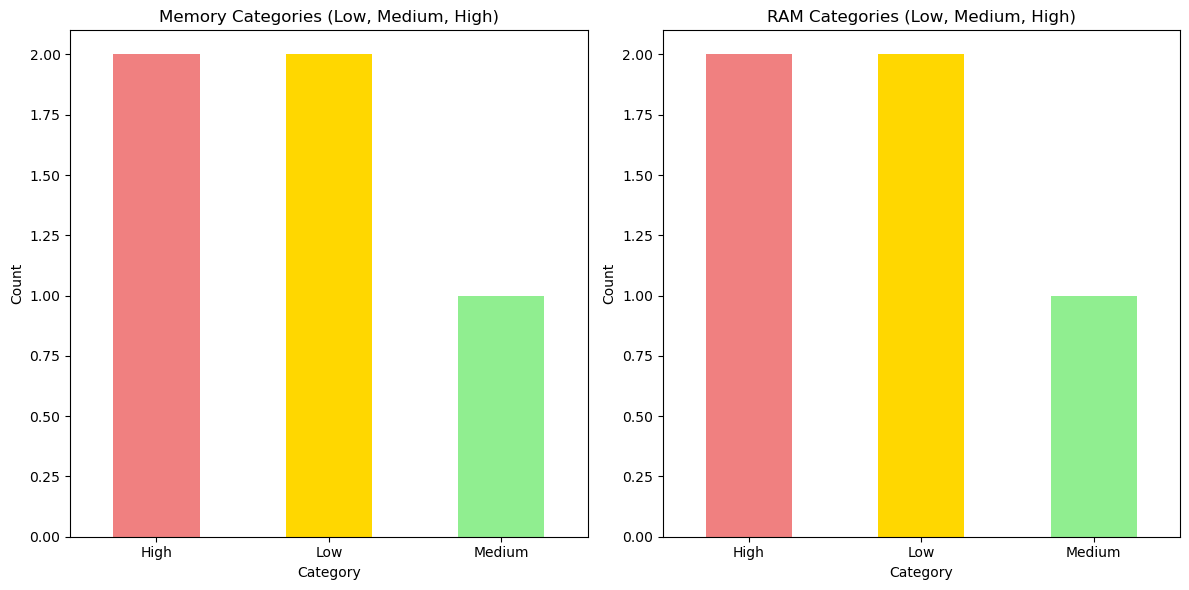

Memory Categories:
 Memory
128      High
64       High
256    Medium
32        Low
16        Low
Name: count, dtype: object
RAM Categories:
 RAM
4      High
8      High
6    Medium
3       Low
2       Low
Name: count, dtype: object


In [15]:

# Get the count of each unique value in the 'Memory' and 'RAM' columns
Memory_counts = df['Memory'].value_counts()
RAM_counts = df['RAM'].value_counts()

# Define thresholds for categorization (using quantiles)
low_threshold = Memory_counts.quantile(0.33)
high_threshold = Memory_counts.quantile(0.66)

# Function to categorize based on count
def categorize(count):
    if count <= low_threshold:
        return 'Low'
    elif count <= high_threshold:
        return 'Medium'
    else:
        return 'High'

# Categorizing the Memory counts
Memory_categories = Memory_counts.apply(categorize)

# Categorizing the RAM counts (using the same thresholds for simplicity)
RAM_categories = RAM_counts.apply(categorize)

# Plotting Memory counts categorized into Low, Medium, and High
plt.figure(figsize=(12, 6))

# Memory plot
plt.subplot(1, 2, 1)  # First subplot
Memory_categories.value_counts().plot(kind='bar', color=['lightcoral', 'gold', 'lightgreen'])
plt.title('Memory Categories (Low, Medium, High)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)

# RAM plot
plt.subplot(1, 2, 2)  # Second subplot
RAM_categories.value_counts().plot(kind='bar', color=['lightcoral', 'gold', 'lightgreen'])
plt.title('RAM Categories (Low, Medium, High)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Layout adjustments
plt.tight_layout()

# Show the plot
plt.show()

# Optionally, if you want to print categorized data
print("Memory Categories:\n", Memory_categories)
print("RAM Categories:\n", RAM_categories)


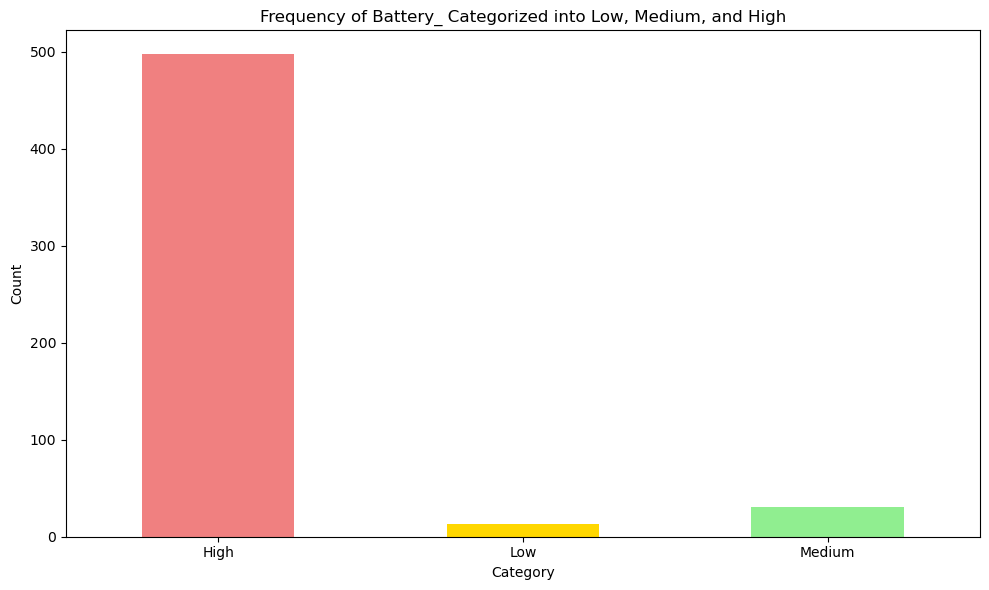

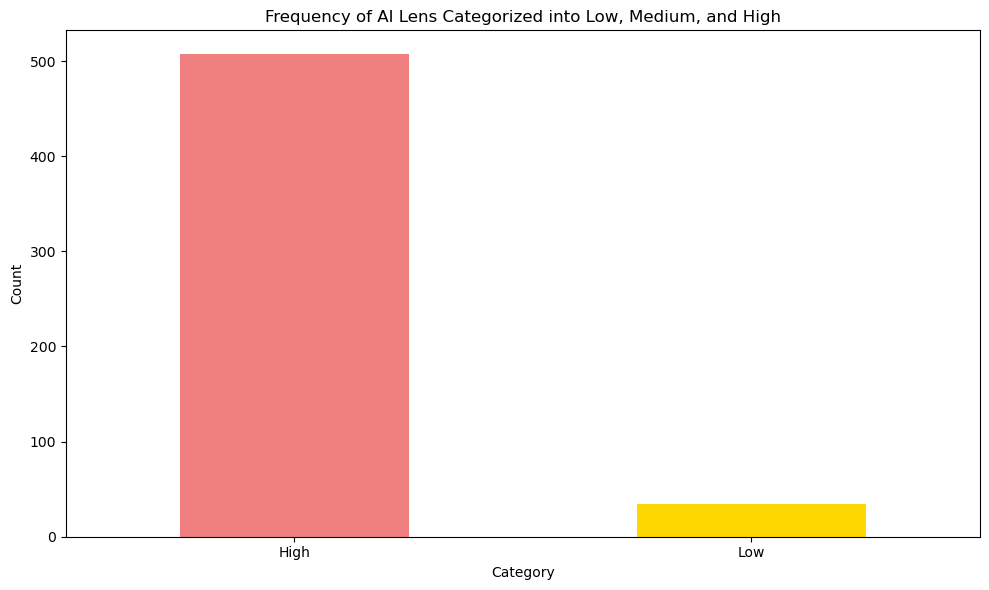

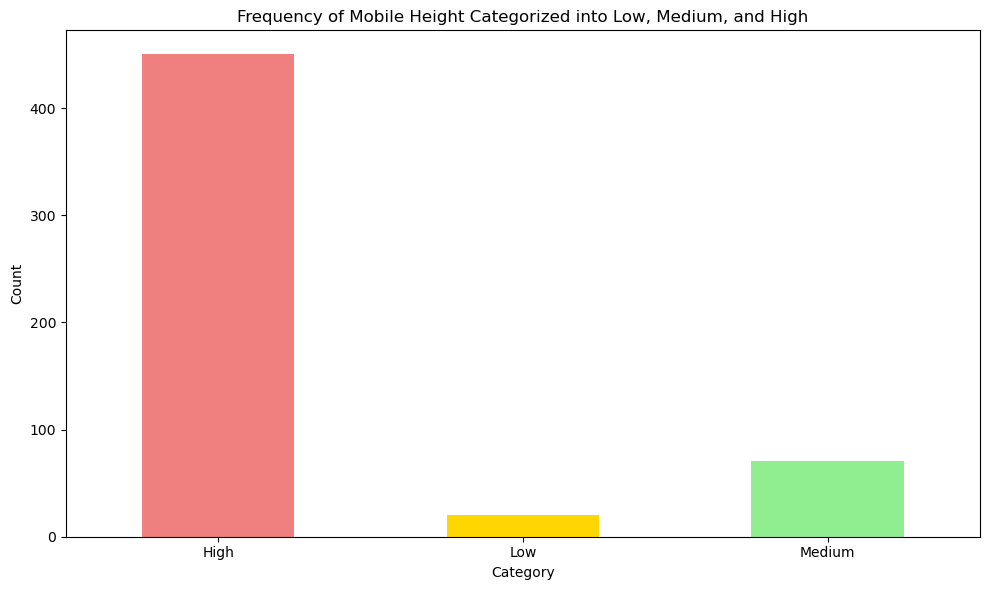

In [21]:
import matplotlib.pyplot as plt

# Define a function to categorize the numerical columns based on quantiles
def categorize_numerical_column(counts):
    low_threshold = counts.quantile(0.33)  # Lower third
    high_threshold = counts.quantile(0.66)  # Upper third
    
    def categorize(count):
        if count <= low_threshold:
            return 'Low'
        elif count <= high_threshold:
            return 'Medium'
        else:
            return 'High'
    
    return counts.apply(categorize)

# List of columns to categorize
columns_to_categorize = ['Battery_','AI Lens', 'Mobile Height']

# Loop through the columns and categorize them
for column in columns_to_categorize:
    if df[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        counts = df[column].value_counts()
        categories = categorize_numerical_column(counts)

        # Create a DataFrame to show count and categories
        categorized_counts = pd.DataFrame({
            'Count': counts,
            'Category': categories
        })

        # Plotting the categorized data
        plt.figure(figsize=(10, 6))
        categorized_counts['Count'].groupby(categorized_counts['Category']).sum().plot(kind='bar', color=['lightcoral', 'gold', 'lightgreen'])
        plt.title(f'Frequency of {column} Categorized into Low, Medium, and High')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.xticks(rotation=0)
        plt.tight_layout()

        # Show the plot
        plt.show()

      

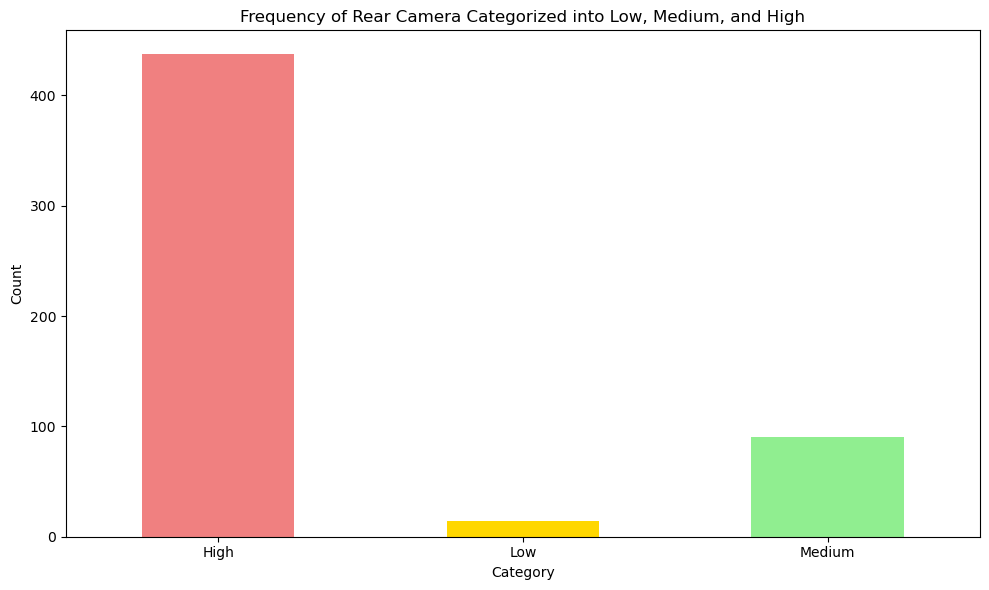

Categorized counts for Rear Camera:
             Count Category
Rear Camera                
50MP           260     High
13MP            63     High
64MP            62     High
8MP             52     High
48MP            31   Medium
108MP           31   Medium
0MP             10   Medium
12MP            10   Medium
200MP            8   Medium
2MP              6      Low
5MP              3      Low
40MP             2      Low
32MP             2      Low
16MP             1      Low


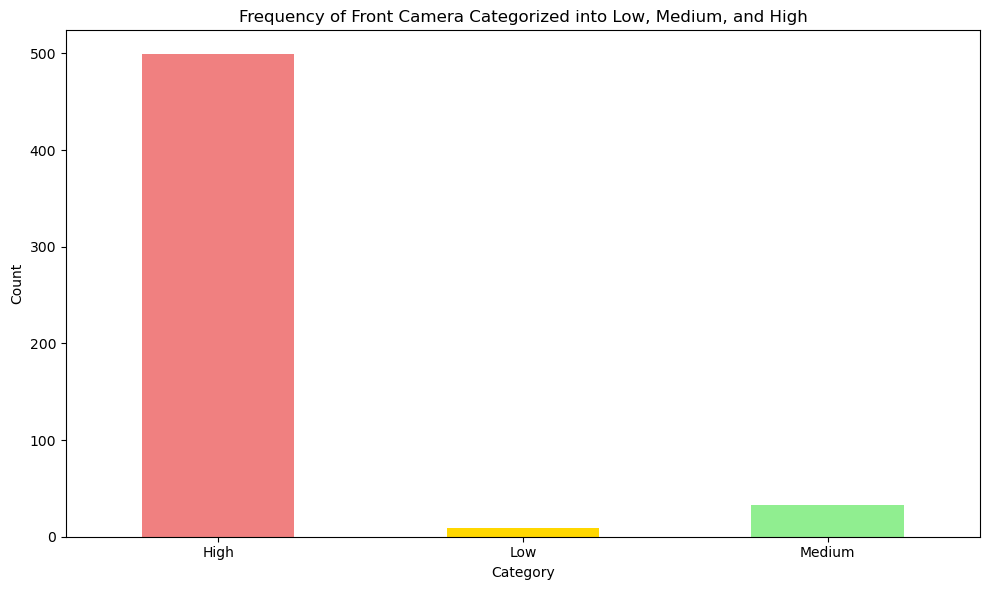

Categorized counts for Front Camera:
              Count Category
Front Camera                
16MP            164     High
5MP             135     High
8MP             129     High
13MP             49     High
32MP             22     High
0MP              16   Medium
50MP              7   Medium
12MP              6   Medium
60MP              4   Medium
2MP               3      Low
10MP              2      Low
20MP              2      Low
44MP              2      Low


In [19]:
# Define a function to categorize numerical columns
def categorize_numerical_column(counts):
    low_threshold = counts.quantile(0.33)  # Lower third
    high_threshold = counts.quantile(0.66)  # Upper third
    
    def categorize(count):
        if count <= low_threshold:
            return 'Low'
        elif count <= high_threshold:
            return 'Medium'
        else:
            return 'High'
    
    return counts.apply(categorize)

# Rear Camera Categorization
rear_camera_counts = df['Rear Camera'].value_counts()
rear_camera_categories = categorize_numerical_column(rear_camera_counts)

# Create a DataFrame to show the Rear Camera counts and their categories
categorized_rear_camera = pd.DataFrame({
    'Count': rear_camera_counts,
    'Category': rear_camera_categories
})

# Plotting the categorized Rear Camera data
plt.figure(figsize=(10, 6))
categorized_rear_camera['Count'].groupby(categorized_rear_camera['Category']).sum().plot(kind='bar', color=['lightcoral', 'gold', 'lightgreen'])
plt.title('Frequency of Rear Camera Categorized into Low, Medium, and High')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot for Rear Camera
plt.show()

# Print the categorized Rear Camera data
print("Categorized counts for Rear Camera:")
print(categorized_rear_camera)

# Front Camera Categorization
front_camera_counts = df['Front Camera'].value_counts()
front_camera_categories = categorize_numerical_column(front_camera_counts)

# Create a DataFrame to show the Front Camera counts and their categories
categorized_front_camera = pd.DataFrame({
    'Count': front_camera_counts,
    'Category': front_camera_categories
})

# Plotting the categorized Front Camera data
plt.figure(figsize=(10, 6))
categorized_front_camera['Count'].groupby(categorized_front_camera['Category']).sum().plot(kind='bar', color=['lightcoral', 'gold', 'lightgreen'])
plt.title('Frequency of Front Camera Categorized into Low, Medium, and High')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot for Front Camera
plt.show()

# Print the categorized Front Camera data
print("Categorized counts for Front Camera:")
print(categorized_front_camera)


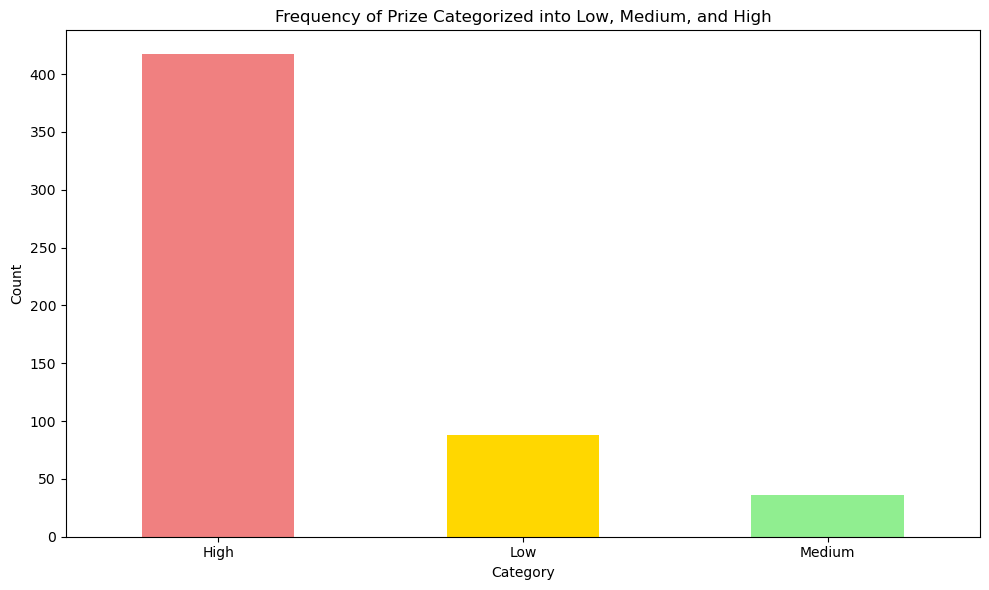

Categorized counts for Prize:
        Count Category
Prize                 
15,999     23     High
9,999      22     High
16,999     21     High
8,999      20     High
23,999     19     High
...       ...      ...
20,998      1      Low
29,499      1      Low
8,495       1      Low
8,449       1      Low
38,999      1      Low

[158 rows x 2 columns]


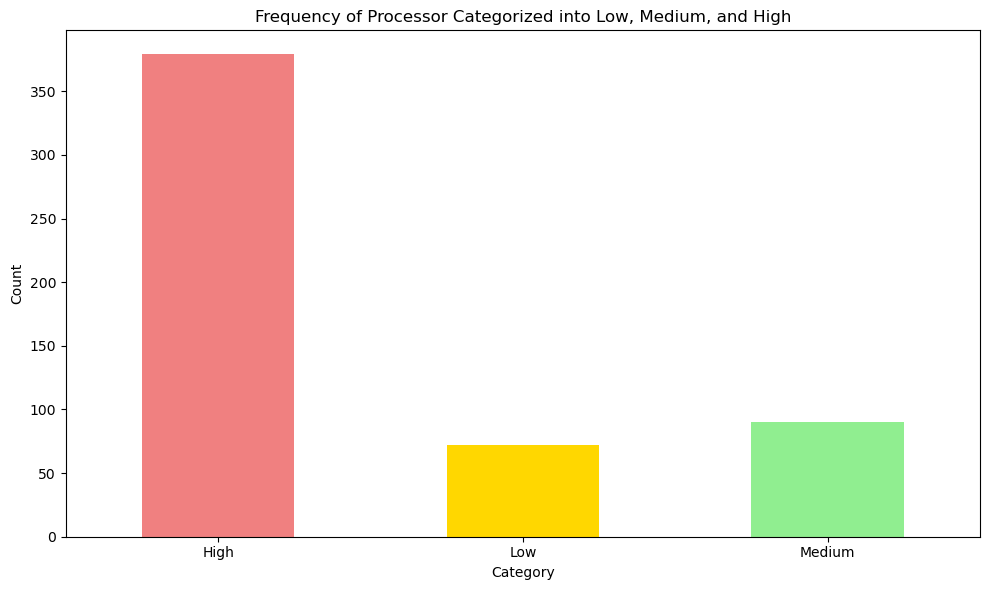

Categorized counts for Processor:
                             Count Category
Processor_                                 
Qualcomm Snapdragon 680         33     High
Unisoc T612                     21     High
Mediatek Helio A22              19     High
Mediatek Dimensity 1080         18     High
Qualcomm Snapdragon 695 5G      17     High
...                            ...      ...
Qualcomm Snapdragon 439          1      Low
Snapdragon 680                   1      Low
snapdragon 888                   1      Low
Qualcomm Snapdragon 855          1      Low
Qualcomm Snapdragon 8 Gen 2      1      Low

[123 rows x 2 columns]


In [20]:
# Define a function to categorize numerical columns
def categorize_numerical_column(counts):
    low_threshold = counts.quantile(0.33)  # Lower third
    high_threshold = counts.quantile(0.66)  # Upper third
    
    def categorize(count):
        if count <= low_threshold:
            return 'Low'
        elif count <= high_threshold:
            return 'Medium'
        else:
            return 'High'
    
    return counts.apply(categorize)

# Prize Categorization
prize_counts = df['Prize'].value_counts()
prize_categories = categorize_numerical_column(prize_counts)

# Create a DataFrame to show the Prize counts and their categories
categorized_prize = pd.DataFrame({
    'Count': prize_counts,
    'Category': prize_categories
})

# Plotting the categorized Prize data
plt.figure(figsize=(10, 6))
categorized_prize['Count'].groupby(categorized_prize['Category']).sum().plot(kind='bar', color=['lightcoral', 'gold', 'lightgreen'])
plt.title('Frequency of Prize Categorized into Low, Medium, and High')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot for Prize
plt.show()

# Print the categorized Prize data
print("Categorized counts for Prize:")
print(categorized_prize)

# Processor Categorization
processor_counts = df['Processor_'].value_counts()
processor_categories = categorize_numerical_column(processor_counts)

# Create a DataFrame to show the Processor counts and their categories
categorized_processor = pd.DataFrame({
    'Count': processor_counts,
    'Category': processor_categories
})

# Plotting the categorized Processor data
plt.figure(figsize=(10, 6))
categorized_processor['Count'].groupby(categorized_processor['Category']).sum().plot(kind='bar', color=['lightcoral', 'gold', 'lightgreen'])
plt.title('Frequency of Processor Categorized into Low, Medium, and High')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot for Processor
plt.show()

# Print the categorized Processor data
print("Categorized counts for Processor:")
print(categorized_processor)


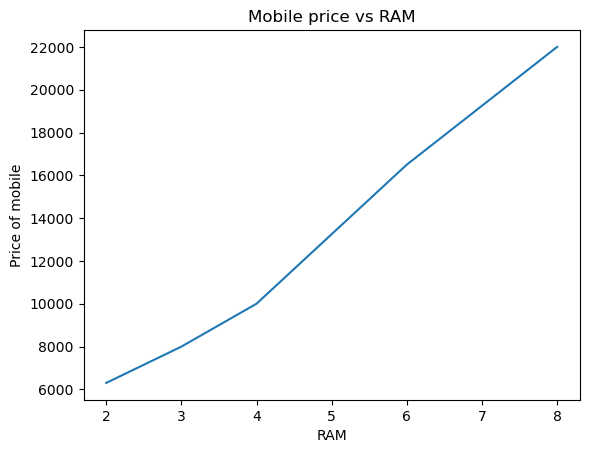

In [20]:
df.groupby('RAM')['Prize'].median().plot()
plt.xlabel("RAM")
plt.ylabel("Price of mobile")
plt.title("Mobile price vs RAM")
plt.show()


this graph shows that as ram increase the price of mobile phone also increases

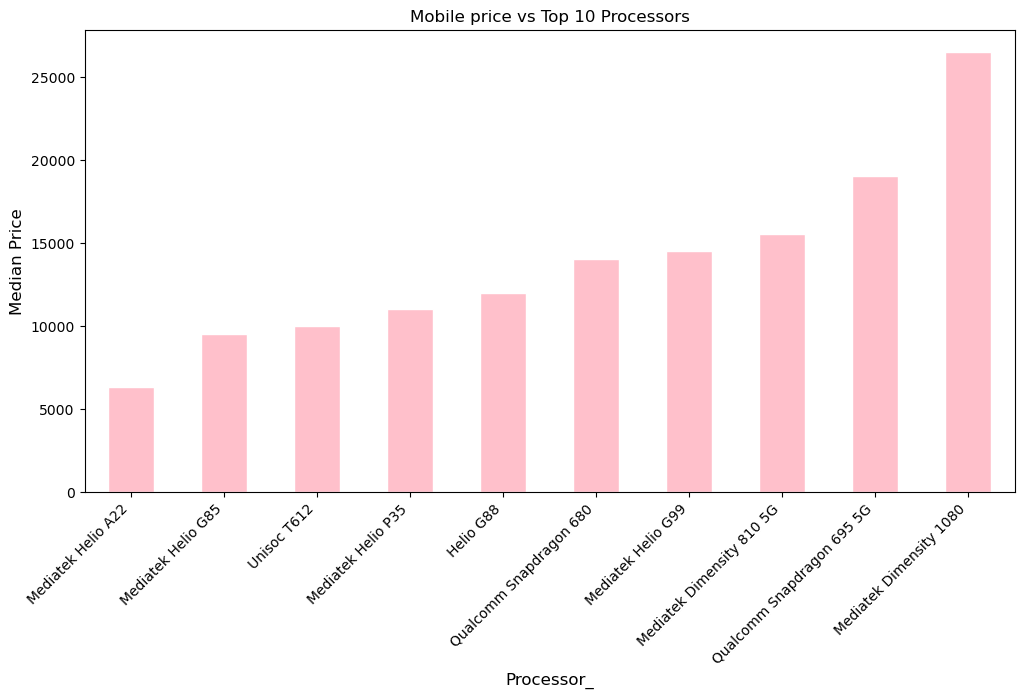

In [286]:
top_processors = df['Processor_'].value_counts().nlargest(10).index
filtered_df = df[df['Processor_'].isin(top_processors)]
median_prices = filtered_df.groupby("Processor_")['Prize'].median()
plt.figure(figsize=(12,6))
median_prices.sort_values().plot(kind="bar",color="pink",edgecolor='white')
plt.xlabel("Processor_",fontsize=12)
plt.ylabel("Median Price",fontsize=12)
plt.title("Mobile price vs Top 10 Processors",fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.show()
    


this graph shows the top 10 processors and out of these processor the price of mediatek dimensity of the 1080 is more then 25000

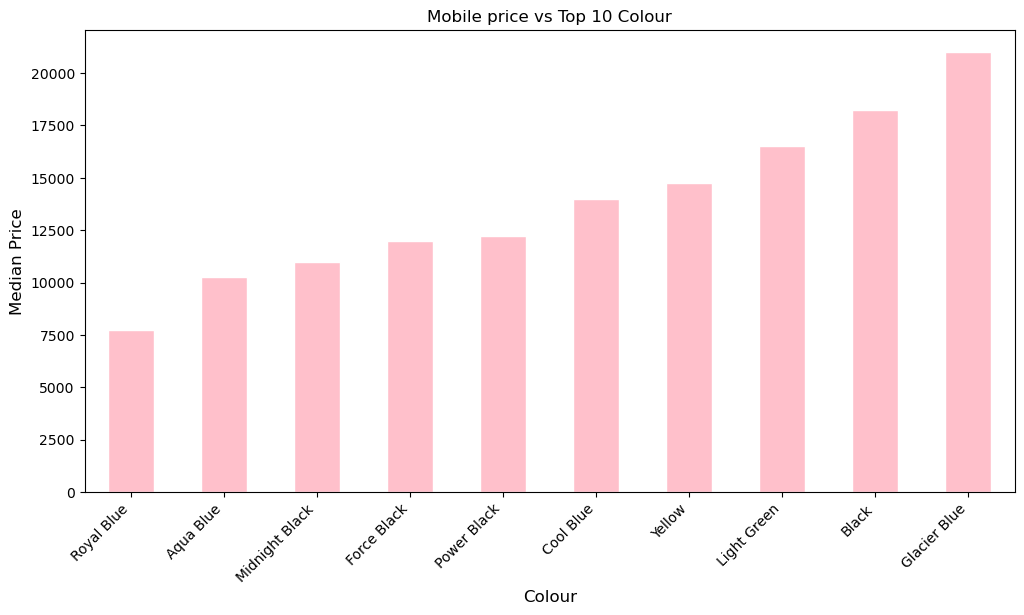

In [34]:
top_processors = df['Colour'].value_counts().nlargest(10).index
filtered_df = df[df['Colour'].isin(top_processors)]
median_prices = filtered_df.groupby("Colour")['Prize'].median()
plt.figure(figsize=(12,6))
median_prices.sort_values().plot(kind="bar",color="pink",edgecolor='white')
plt.xlabel("Colour",fontsize=12)
plt.ylabel("Median Price",fontsize=12)
plt.title("Mobile price vs Top 10 Colour",fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.show()
    


this graph shows the top 10 pcolour and out of these colour are the price of mediatek dimensity of the Glacier Blue  is more then 20000

<h2 style='color:black'>*Checking the outlier with the help of boxplot</h2>

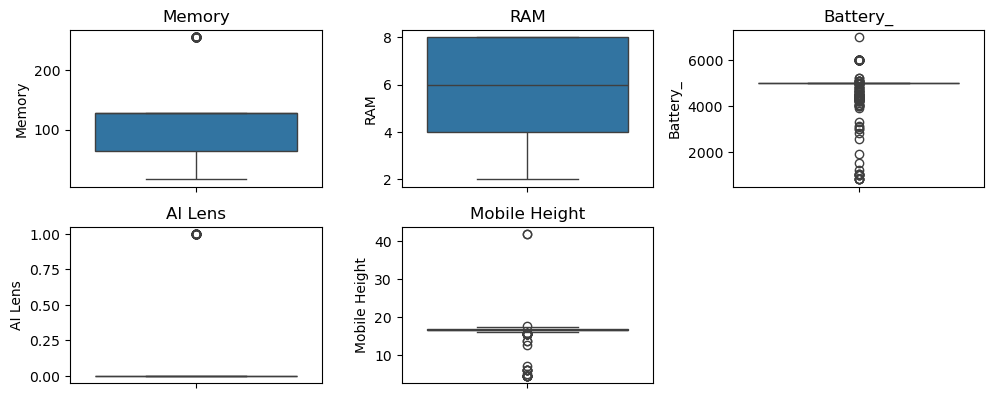

In [41]:
numerical = df.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize=(10,6))
for i,col in enumerate(numerical,1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [22]:
numerical_cols = ['Memory','RAM','Battery_','AI Lens','Mobile Height','Prize']

for i in numerical_cols:
    Q1 = df[i].quantile(0.25)
    print("The first quartile for the column", i, "is", Q1)
    Q2 = df[i].quantile(0.50)
    print("The second quartile for the column", i, "is", Q2)
    
    Q3 = df[i].quantile(0.75)
    print("The Third quartile for the column", i, "is", Q3)
    IQR = Q3 - Q1

    LL = Q1 - 1.5 * IQR  # Lower limit
    print("The lower limit for the column", i, "is", LL)

    UL = Q3 + 1.5 * IQR  # Upper limit
    print("The upper limit for the column", i, "is", UL)

    # Count outliers before treatment
    n = df[(df[i] < LL) | (df[i] > UL)][i].count()
    print(f"The number of outliers in {i} before treatment: {n}")

    # Instead of replacing with median, cap the values
    df[i] = np.where(df[i] < LL, LL, df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])

    # Count outliers after treatment
    n_after = df[(df[i] < LL) | (df[i] > UL)][i].count()
    print(f"The number of outliers in {i} after treatment: {n_after}\n")

# Ensure data type is numeric
df[numerical_cols] = df[numerical_cols].astype(float)

The first quartile for the column Memory is 64.0
The second quartile for the column Memory is 128.0
The Third quartile for the column Memory is 128.0
The lower limit for the column Memory is -32.0
The upper limit for the column Memory is 224.0
The number of outliers in Memory before treatment: 55
The number of outliers in Memory after treatment: 0

The first quartile for the column RAM is 4.0
The second quartile for the column RAM is 6.0
The Third quartile for the column RAM is 8.0
The lower limit for the column RAM is -2.0
The upper limit for the column RAM is 14.0
The number of outliers in RAM before treatment: 0
The number of outliers in RAM after treatment: 0

The first quartile for the column Battery_ is 5000.0
The second quartile for the column Battery_ is 5000.0
The Third quartile for the column Battery_ is 5000.0
The lower limit for the column Battery_ is 5000.0
The upper limit for the column Battery_ is 5000.0
The number of outliers in Battery_ before treatment: 152
The number

**Using IQR Method to remove Outlier**

In [23]:
from scipy.stats.mstats import winsorize
outlier_cols = ['Prize',]
def winsorize_outliers(df,columns,limit=0.5):
    df_clean = df.copy()
    for col in columns:
        df_clean[col]=winsorize(df_clean[col],limits=[limit,limit])
        return df_clean
df_clean=winsorize_outliers(df,outlier_cols)
print(df_clean[outlier_cols].describe())

         Prize
count    541.0
mean   13499.0
std        0.0
min    13499.0
25%    13499.0
50%    13499.0
75%    13499.0
max    13499.0


In [98]:
# Define the IQR function
def iqr_technique(series):
    Q1 = np.percentile(series, 25)  # 25th percentile
    Q3 = np.percentile(series, 75)  # 75th percentile
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit, upper_limit

# Use the function to compute IQR limits
lower_limit_iqr, upper_limit_iqr = iqr_technique(df['Mobile Height'])

# Apply IQR technique to cap the outliers
df['Mobile Height'] = np.where(df['Mobile Height'] > upper_limit_iqr, upper_limit_iqr,
                                np.where(df['Mobile Height'] < lower_limit_iqr, lower_limit_iqr, df['Mobile Height']))

# Confirm that outliers are capped
print(df['Mobile Height'].describe())


count    541.0
mean      16.0
std        0.0
min       16.0
25%       16.0
50%       16.0
75%       16.0
max       16.0
Name: Mobile Height, dtype: float64


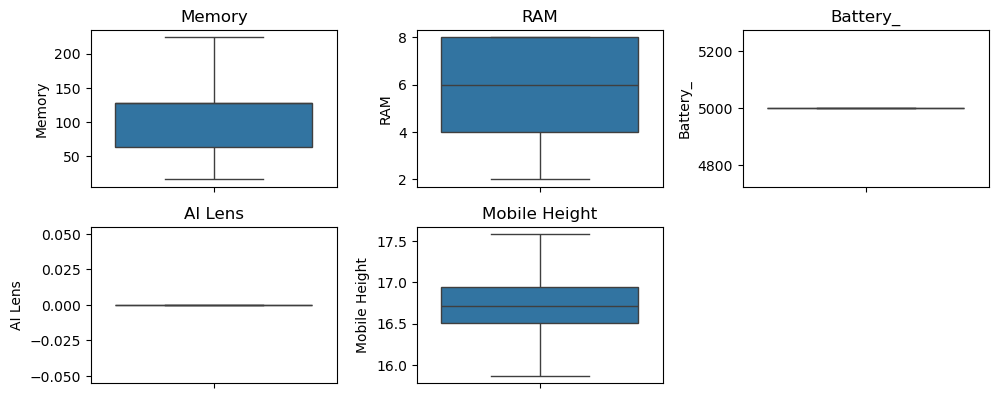

In [81]:
numerical = df.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize=(10,6))
for i,col in enumerate(numerical,1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Skewness**

In [74]:
num_col=df.select_dtypes(include=['float64','int64','int32']).columns

skewness = df[num_col].skew()
print(skewness)

Memory           1.029704
RAM              0.067617
Battery_        -3.304250
AI Lens          3.612638
Mobile Height    1.171778
dtype: float64


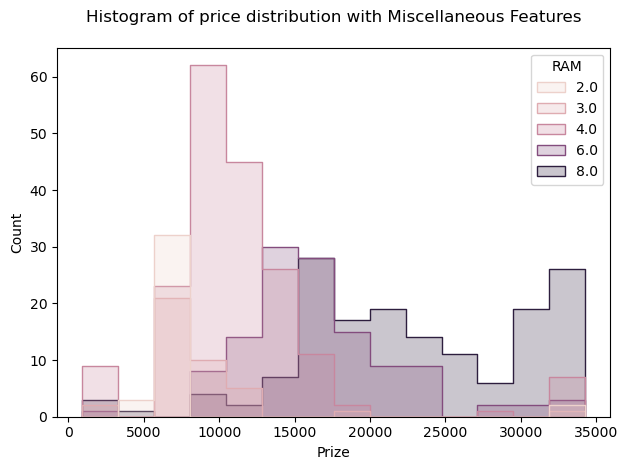

In [99]:
sns.histplot(data=df,x='Prize',hue='RAM',element='step')
plt.title('Histogram of price distribution with Miscellaneous Features\n')
plt.tight_layout()
plt.show()

# the highest sales by RAM & Price Range:
4GB RAM : 10000-15000 (most sold category)
6GB RAM: 15000 -20000 (also popular)

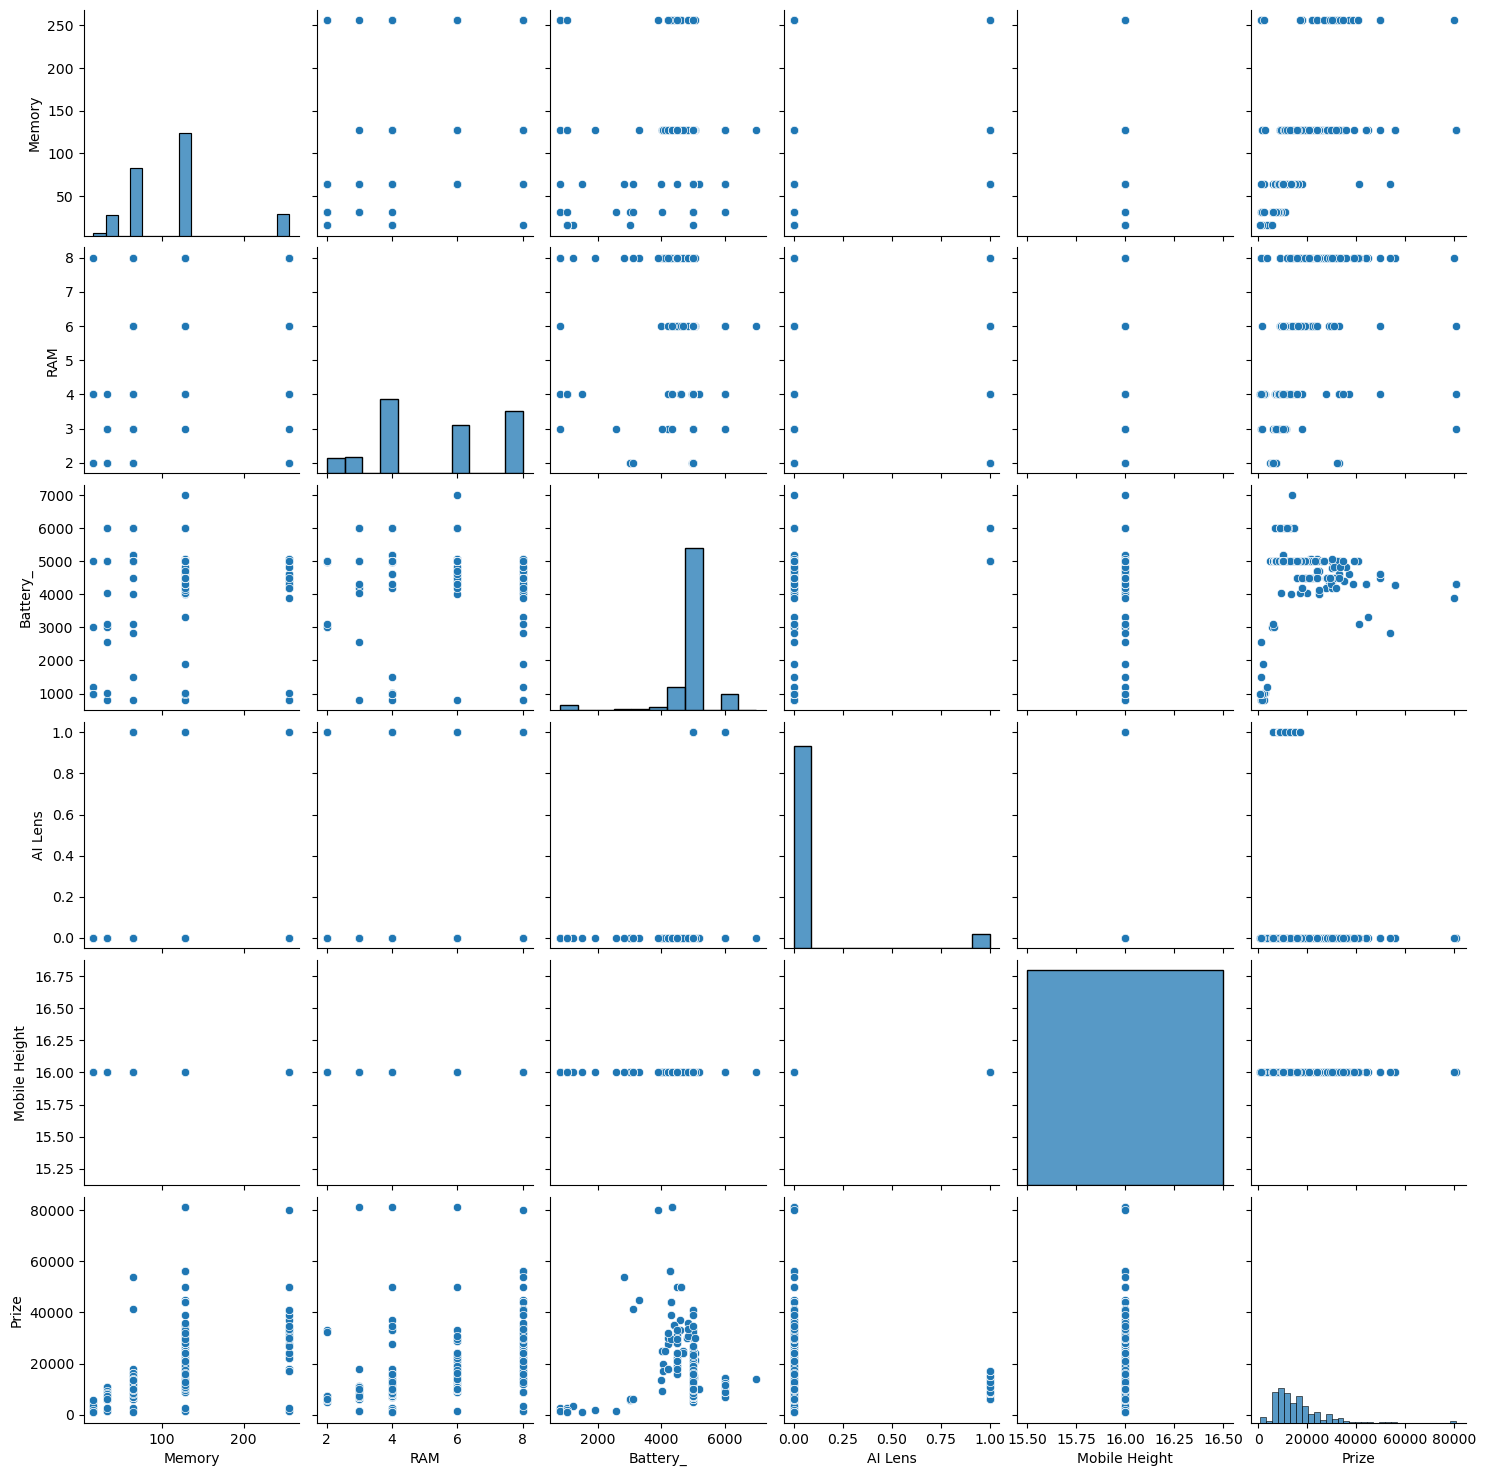

<Figure size 640x480 with 0 Axes>

In [39]:
sns.pairplot(df[['Model','Colour','Memory','RAM','Battery_','Rear Camera','Front Camera','AI Lens','Mobile Height','Processor_','Prize']])
plt.show()
# Add a title to the plot
plt.suptitle('Pair Plot: Retationships between features and mobile prices',y=1.02)
plt.show()


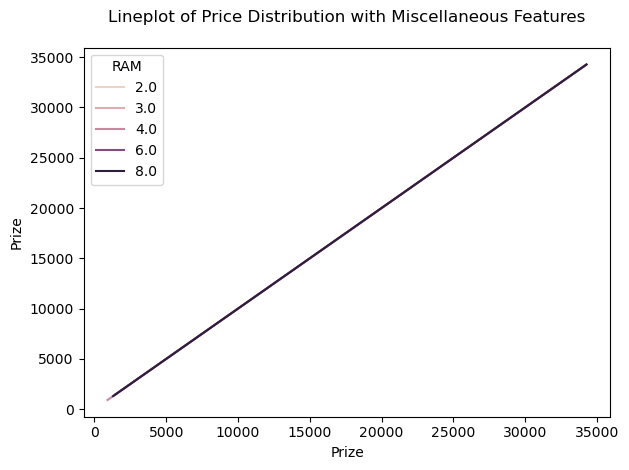

In [102]:
sns.lineplot(data=df, x='Prize', y='Prize', hue='RAM')

# Title and layout adjustments
plt.title('Lineplot of Price Distribution with Miscellaneous Features\n')
plt.tight_layout()
plt.show()

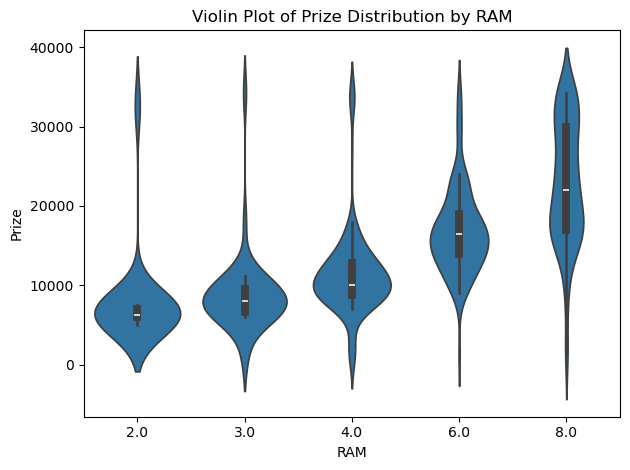

In [103]:
sns.violinplot(data=df, x='RAM', y='Prize')

# Title and layout adjustments
plt.title('Violin Plot of Prize Distribution by RAM')
plt.tight_layout()
plt.show()

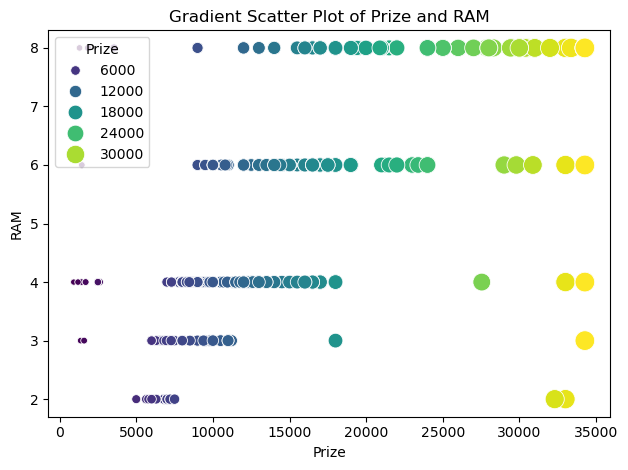

In [104]:
# Assuming 'df' is your DataFrame and has 'Prize' and 'RAM' columns
sns.scatterplot(data=df, x='Prize', y='RAM', hue='Prize', palette='viridis', size='Prize', sizes=(20, 200))

# Title and layout adjustments
plt.title('Gradient Scatter Plot of Prize and RAM')
plt.tight_layout()
plt.show()

<h1>
Insights from the Scatter Plot (Price vs. RAM):
    
# 1.Higher RAM = Higher Price:
Phones with higher RAM(6GB, 8GB) are priced in the 25000-35000 range.
lower RAM phones(2GB,3GB) are mostly under 10000
# Most sales in Mid-Range:
A dense cluster of points is visible in the 10000-20000 range with 4GB and 6GB RAM.
# Premium Segment(above 30000)
Mostly 8GB RAM phones, indicating that flagship devices come with higher memory.
# Conclusion:
4GB-^GB RAM phones in 10000-20000 are the most popular.
2GB-3GB RAM phones are budget-friendlt (under 10000).
8GB RAM phones are premium, priced above 30000.


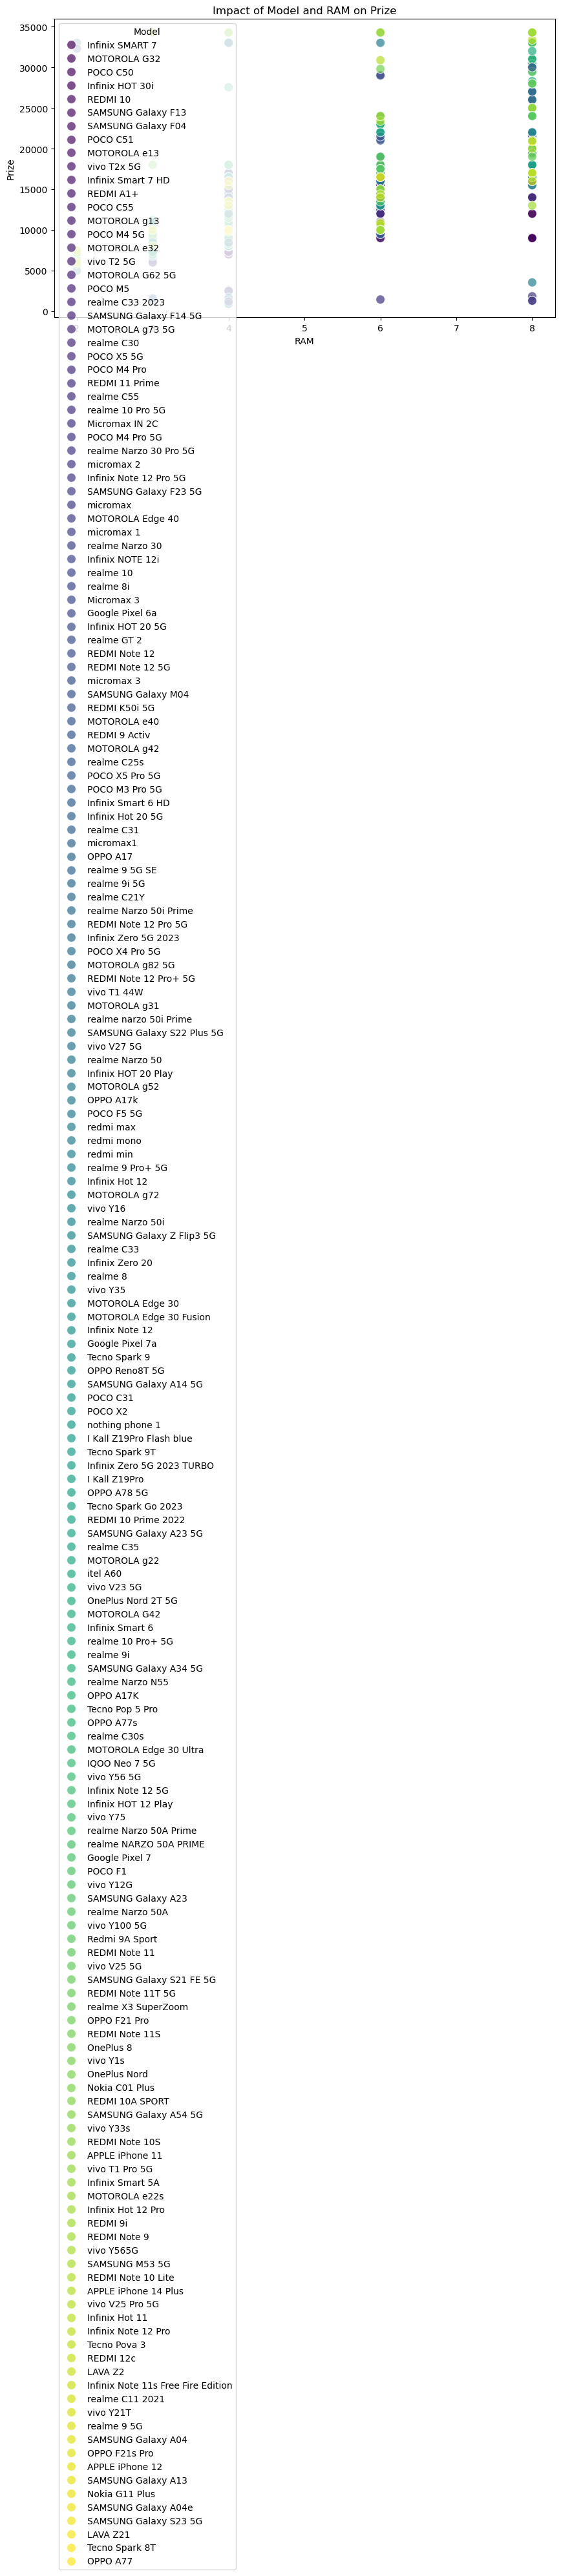

In [105]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAM', y='Prize', hue='Model', palette='viridis', s=100, alpha=0.7)

# Title and layout adjustments
plt.title('Impact of Model and RAM on Prize')
plt.tight_layout()
plt.show()

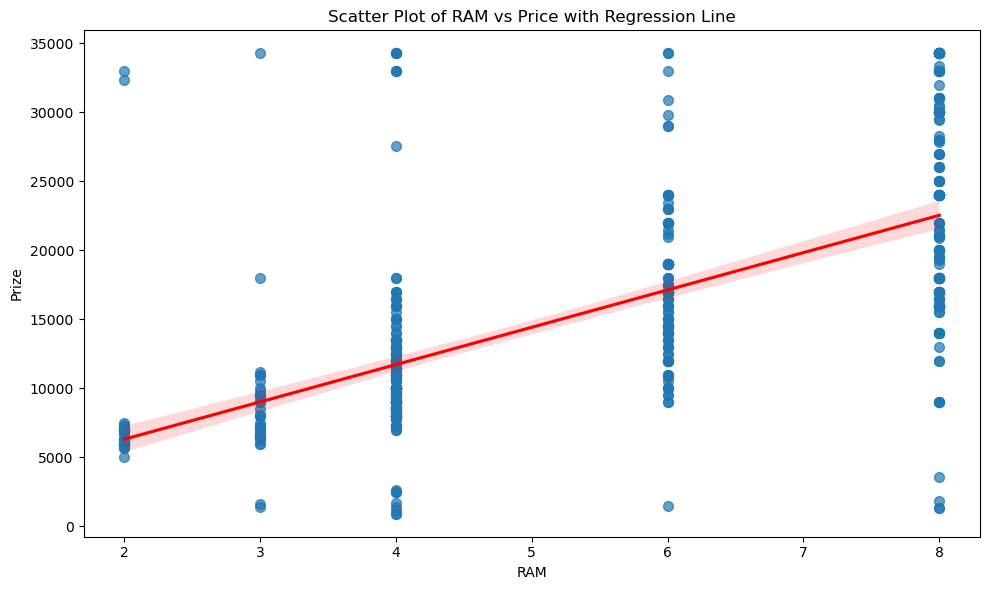

Pearson correlation between RAM and Price: 0.6514902227130336
Pearson Correlation Coefficient: 0.6514902227130334
P-value: 1.1627110674512298e-66


In [112]:
# Scatter plot with a regression line to visualize the relationship between RAM and Price
plt.figure(figsize=(10, 6))
sns.regplot(x='RAM', y='Prize', data=df, scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})

# Title and layout adjustments
plt.title('Scatter Plot of RAM vs Price with Regression Line')
plt.tight_layout()
plt.show()
# Calculate the Pearson correlation coefficient between RAM and Price
correlation = df['RAM'].corr(df['Prize'])
print(f"Pearson correlation between RAM and Price: {correlation}")
import scipy.stats as stats

# Perform Pearson correlation significance test
corr_coef, p_value = stats.pearsonr(df['RAM'], df['Prize'])
print(f"Pearson Correlation Coefficient: {corr_coef}")
print(f"P-value: {p_value}")


<h1>
Insight trand Regration Line
    
# 1. Price vs RAM Trend 
Positive correlation (r=0.65):
jaise RAM badhta h baise hi price increse ho raha h 
high RAM wale phones (6GB & *GB)
ka price 30000 or range me h jabki low RAM wale (2Gb & 3GB) ka price mostly 5000-15000

**Sales zyda 4GB & 6GB variants me ho rha h **
@GB & 3GB pones ki demand kam h 
*GB RAM wale phones high price range me h but sales comparatively kam h 

                 Memory       RAM     Prize  Model_encoded
Memory         1.000000  0.665364  0.692721       0.043678
RAM            0.665364  1.000000  0.651490       0.005924
Prize          0.692721  0.651490  1.000000       0.006963
Model_encoded  0.043678  0.005924  0.006963       1.000000


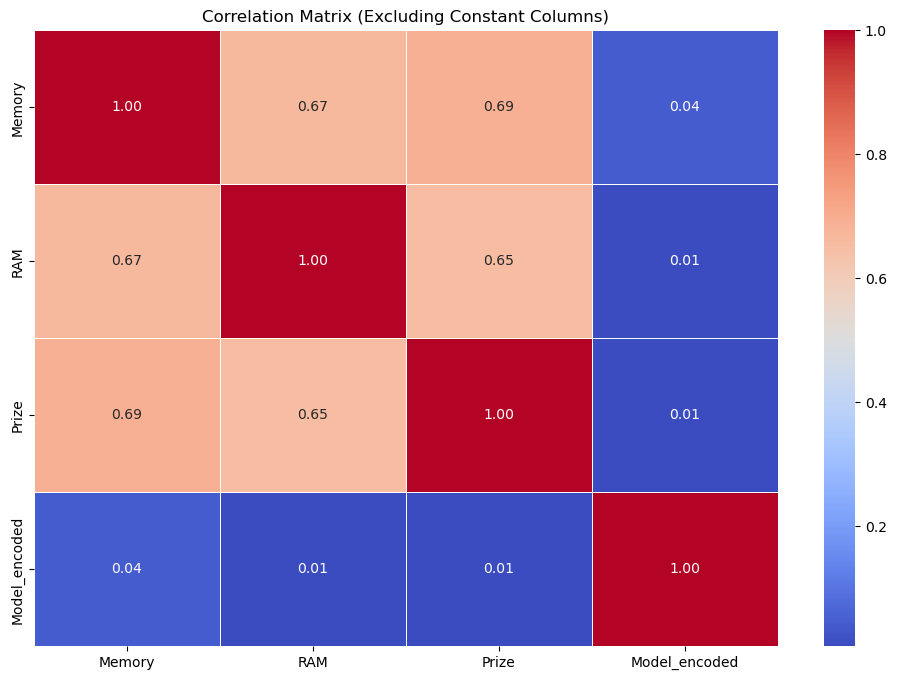

In [115]:
# Exclude columns with zero variance
numerical_df = df.select_dtypes(include=['number'])
numerical_df = numerical_df.loc[:, numerical_df.var() != 0]

# Recompute the correlation matrix
corr = numerical_df.corr()
print(corr)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Excluding Constant Columns)')
plt.show()


<h1>
Corration of Insight

# 1. Memory & Price (0.69) Strong postive correlation
Higher storage options (128GB , 256GB) wale phones ka prices high h
# 2. RAM & Price 
(0.65) moderate to stronge positive correlation
higher RAM wale phone(6GB,*GB) ka price high h 
# 3. Memory & rAM (0.67)
Strong correlation
jisme RAM jyda hoti h usme genrally Memory bhi jydahoti h
# 4 . Model_encoded & Other Features
(~0.01-0.04) no significant correlation
# conclusion:
Memory & RAM pric ko strongly influence karte h 
higher RAM aur zyda strage wale phones ka price consistenly high h
Brands/ models ka pricing pattern fixed nhi h unka ko strong correlation nhi dikha rha

In [25]:
df['Rear_Camera_MP']=df['Rear Camera'].str.replace('MP','').astype(int)
df['Front_Camera_MP']=df['Front Camera'].str.replace('MP','').astype(int)
print(df[['Rear Camera','Front Camera','RAM']])


    Rear Camera Front Camera  RAM
0          13MP          5MP  4.0
1          13MP          5MP  4.0
2          50MP         16MP  8.0
3           8MP          5MP  2.0
4          50MP          5MP  8.0
..          ...          ...  ...
536        50MP         12MP  8.0
537         5MP          2MP  2.0
538        50MP          8MP  4.0
539        50MP         32MP  8.0
540        50MP          8MP  4.0

[541 rows x 3 columns]


<h1 style='color:purple' align='center'>Feature Engeering </h1>

In [26]:
df['Price_ram']=df['Prize']/df['RAM']
df['Price_per_memory']=df['Prize']/df['Memory']
df['Price_bettery_level']=df['Prize']/df['Battery_']

In [27]:
df

Model          Colour  Memory  RAM  Battery_ Rear Camera  \
0          Infinix SMART 7     Night Black    64.0  4.0    5000.0        13MP   
1          Infinix SMART 7      Azure Blue    64.0  4.0    5000.0        13MP   
2             MOTOROLA G32    Mineral Gray   128.0  8.0    5000.0        50MP   
3                 POCO C50      Royal Blue    32.0  2.0    5000.0         8MP   
4          Infinix HOT 30i        Marigold   128.0  8.0    5000.0        50MP   
..                     ...             ...     ...  ...       ...         ...   
536  SAMSUNG Galaxy S23 5G           Cream   224.0  8.0    5000.0        50MP   
537               LAVA Z21            Cyan    32.0  2.0    5000.0         5MP   
538         Tecno Spark 8T  Turquoise Cyan    64.0  4.0    5000.0        50MP   
539  SAMSUNG Galaxy A54 5G    Awesome Lime   128.0  8.0    5000.0        50MP   
540               OPPO A77        Sky Blue   128.0  4.0    5000.0        50MP   

    Front Camera  AI Lens  Mobile Height                   Processor_  \
0            5MP      0.0           16.0   Unisoc Spreadtrum SC9863A1   
1            5MP      0.0           16.0   Unisoc Spreadtrum SC9863A1   
2           16MP      0.0           16.0      Qualcomm Snapdragon 680   
3            5MP      0.0           16.0           Mediatek Helio A22   
4            5MP      0.0           16.0                          G37   
..           ...      ...            ...                          ...   
536         12MP      0.0           16.0  Qualcomm Snapdragon 8 Gen 2   
537          2MP      0.0           16.0                    Octa Core   
538          8MP      0.0           16.0           MediaTek Helio G35   
539         32MP      0.0           16.0      Exynos 1380, Octa Core    
540          8MP      0.0           16.0           Mediatek Helio G35   

       Prize  Rear_Camera_MP  Front_Camera_MP  Price_ram  Price_per_memory  \
0     7299.0              13                5   1824.750        114.046875   
1     7299.0              13                5   1824.750        114.046875   
2    11999.0              50               16   1499.875         93.742188   
3     5649.0               8                5   2824.500        176.531250   
4     8999.0              50                5   1124.875         70.304688   
..       ...             ...              ...        ...               ...   
536  34265.0              50               12   4283.125        152.968750   
537   5998.0               5                2   2999.000        187.437500   
538   9990.0              50                8   2497.500        156.093750   
539  34265.0              50               32   4283.125        267.695312   
540  15999.0              50                8   3999.750        124.992188   

     Price_bettery_level  
0                 1.4598  
1                 1.4598  
2                 2.3998  
3                 1.1298  
4                 1.7998  
..                   ...  
536               6.8530  
537               1.1996  
538               1.9980  
539               6.8530  
540               3.1998  

[541 rows x 16 columns]

In [28]:
df.dtypes

Model                   object
Colour                  object
Memory                 float64
RAM                    float64
Battery_               float64
Rear Camera             object
Front Camera            object
AI Lens                float64
Mobile Height          float64
Processor_              object
Prize                  float64
Rear_Camera_MP           int32
Front_Camera_MP          int32
Price_ram              float64
Price_per_memory       float64
Price_bettery_level    float64
dtype: object

In [29]:
df.isnull().sum()

Model                  0
Colour                 0
Memory                 0
RAM                    0
Battery_               0
Rear Camera            0
Front Camera           0
AI Lens                0
Mobile Height          0
Processor_             0
Prize                  0
Rear_Camera_MP         0
Front_Camera_MP        0
Price_ram              0
Price_per_memory       0
Price_bettery_level    0
dtype: int64

In [30]:
le=LabelEncoder

In [32]:
categorical_cols = ['Model','Colour','Processor_','Rear Camera','Front Camera']
#Apply label encodeing
label_encoders={}
for col in categorical_cols:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders[col]=le

In [33]:
df

Model  Colour  Memory  RAM  Battery_  Rear Camera  Front Camera  AI Lens  \
0       23     159    64.0  4.0    5000.0            3            10      0.0   
1       23      20    64.0  4.0    5000.0            3            10      0.0   
2       37     149   128.0  8.0    5000.0           10             4      0.0   
3       69     201    32.0  2.0    5000.0           13            10      0.0   
4       12     130   128.0  8.0    5000.0           10            10      0.0   
..     ...     ...     ...  ...       ...          ...           ...      ...   
536    118      49   224.0  8.0    5000.0           10             2      0.0   
537     32      52    32.0  2.0    5000.0           11             6      0.0   
538    123     259    64.0  4.0    5000.0           10            12      0.0   
539    110      17   128.0  8.0    5000.0           10             7      0.0   
540     59     215   128.0  4.0    5000.0           10            12      0.0   

     Mobile Height  Processor_    Prize  Rear_Camera_MP  Front_Camera_MP  \
0             16.0         113   7299.0              13                5   
1             16.0         113   7299.0              13                5   
2             16.0          75  11999.0              50               16   
3             16.0          56   5649.0               8                5   
4             16.0          14   8999.0              50                5   
..             ...         ...      ...             ...              ...   
536           16.0          89  34265.0              50               12   
537           16.0          68   5998.0               5                2   
538           16.0          35   9990.0              50                8   
539           16.0          11  34265.0              50               32   
540           16.0          57  15999.0              50                8   

     Price_ram  Price_per_memory  Price_bettery_level  
0     1824.750        114.046875               1.4598  
1     1824.750        114.046875               1.4598  
2     1499.875         93.742188               2.3998  
3     2824.500        176.531250               1.1298  
4     1124.875         70.304688               1.7998  
..         ...               ...                  ...  
536   4283.125        152.968750               6.8530  
537   2999.000        187.437500               1.1996  
538   2497.500        156.093750               1.9980  
539   4283.125        267.695312               6.8530  
540   3999.750        124.992188               3.1998  

[541 rows x 16 columns]

**Drop some unesed columns**

In [34]:
df=df.copy()
#Drop unnecesarry columns
columns_to_drop=['Rear Camera','Front Camera']
df = df.drop(columns=columns_to_drop)

In [35]:
df

Model  Colour  Memory  RAM  Battery_  AI Lens  Mobile Height  Processor_  \
0       23     159    64.0  4.0    5000.0      0.0           16.0         113   
1       23      20    64.0  4.0    5000.0      0.0           16.0         113   
2       37     149   128.0  8.0    5000.0      0.0           16.0          75   
3       69     201    32.0  2.0    5000.0      0.0           16.0          56   
4       12     130   128.0  8.0    5000.0      0.0           16.0          14   
..     ...     ...     ...  ...       ...      ...            ...         ...   
536    118      49   224.0  8.0    5000.0      0.0           16.0          89   
537     32      52    32.0  2.0    5000.0      0.0           16.0          68   
538    123     259    64.0  4.0    5000.0      0.0           16.0          35   
539    110      17   128.0  8.0    5000.0      0.0           16.0          11   
540     59     215   128.0  4.0    5000.0      0.0           16.0          57   

       Prize  Rear_Camera_MP  Front_Camera_MP  Price_ram  Price_per_memory  \
0     7299.0              13                5   1824.750        114.046875   
1     7299.0              13                5   1824.750        114.046875   
2    11999.0              50               16   1499.875         93.742188   
3     5649.0               8                5   2824.500        176.531250   
4     8999.0              50                5   1124.875         70.304688   
..       ...             ...              ...        ...               ...   
536  34265.0              50               12   4283.125        152.968750   
537   5998.0               5                2   2999.000        187.437500   
538   9990.0              50                8   2497.500        156.093750   
539  34265.0              50               32   4283.125        267.695312   
540  15999.0              50                8   3999.750        124.992188   

     Price_bettery_level  
0                 1.4598  
1                 1.4598  
2                 2.3998  
3                 1.1298  
4                 1.7998  
..                   ...  
536               6.8530  
537               1.1996  
538               1.9980  
539               6.8530  
540               3.1998  

[541 rows x 14 columns]

In [36]:
df.shape

(541, 14)

In [37]:
df.dtypes

Model                    int64
Colour                   int64
Memory                 float64
RAM                    float64
Battery_               float64
AI Lens                float64
Mobile Height          float64
Processor_               int64
Prize                  float64
Rear_Camera_MP           int32
Front_Camera_MP          int32
Price_ram              float64
Price_per_memory       float64
Price_bettery_level    float64
dtype: object

                        Model    Colour    Memory       RAM  Processor_  \
Model                1.000000  0.106594  0.043678  0.005924    0.036362   
Colour               0.106594  1.000000  0.050022  0.064503   -0.068677   
Memory               0.043678  0.050022  1.000000  0.665364   -0.156441   
RAM                  0.005924  0.064503  0.665364  1.000000   -0.108733   
Processor_           0.036362 -0.068677 -0.156441 -0.108733    1.000000   
Prize                0.006963  0.040032  0.692721  0.651490   -0.068051   
Rear_Camera_MP       0.000340  0.053969  0.542606  0.439558   -0.099895   
Front_Camera_MP      0.048434  0.035167  0.507113  0.493861   -0.040641   
Price_ram            0.012397  0.002354  0.333716 -0.096380    0.004486   
Price_per_memory    -0.012907 -0.030292 -0.347095 -0.042933    0.143419   
Price_bettery_level  0.006963  0.040032  0.692721  0.651490   -0.068051   

                        Prize  Rear_Camera_MP  Front_Camera_MP  Price_ram  \
Model                0

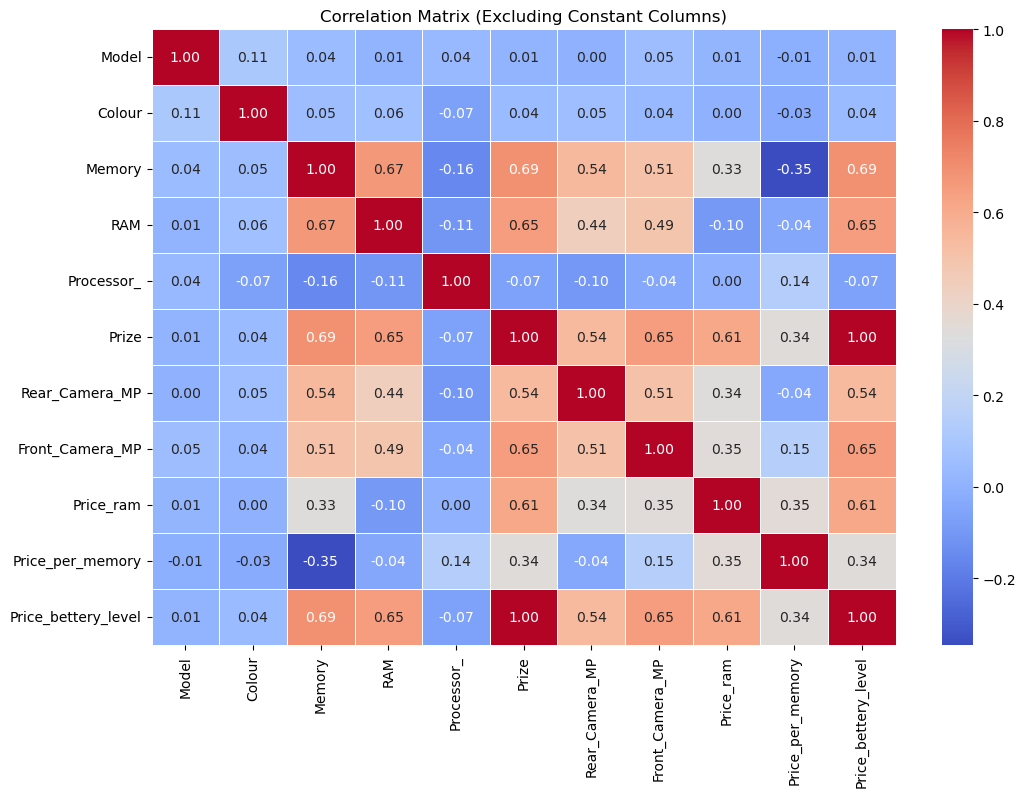

Prize aur Rear_Camera_MP ke beech correlation: 0.5383588234130915


In [38]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df = numerical_df.loc[:, numerical_df.var() != 0]

# Recompute the correlation matrix
corr = numerical_df.corr()
print(corr)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Excluding Constant Columns)')
plt.show()
correlation_Rear_Camera_MP = df['Prize'].corr(df['Rear_Camera_MP'])
#print(f'Prize aur Rear_Camera_MP ke beech correlation: {correlation_prize_battery}')
print(f'Prize aur Rear_Camera_MP ke beech correlation: {correlation_Rear_Camera_MP}')


**Insight**

** Stronge relation insight**
"Prize" ka insight Rear_Camera_MP  ke sath 0.97 h
it mean Rear Camera MP badhne se Price bhi badhta hai
**2.Memory or RAM ka relation**
memory or ram ka relation 0.63 h it mean ram or memory dono sath me balaceing se sath rhte h

**Negative Correlation**
"Model" or AI Lens me -0.40 h it means new model AI Lens use kam ho rha ho 

**Battery aur Price ka relation**
"Battery aur Price" ka 0.34 h it battery price badne se price bhi thoda badta h 


<Figure size 640x480 with 0 Axes>

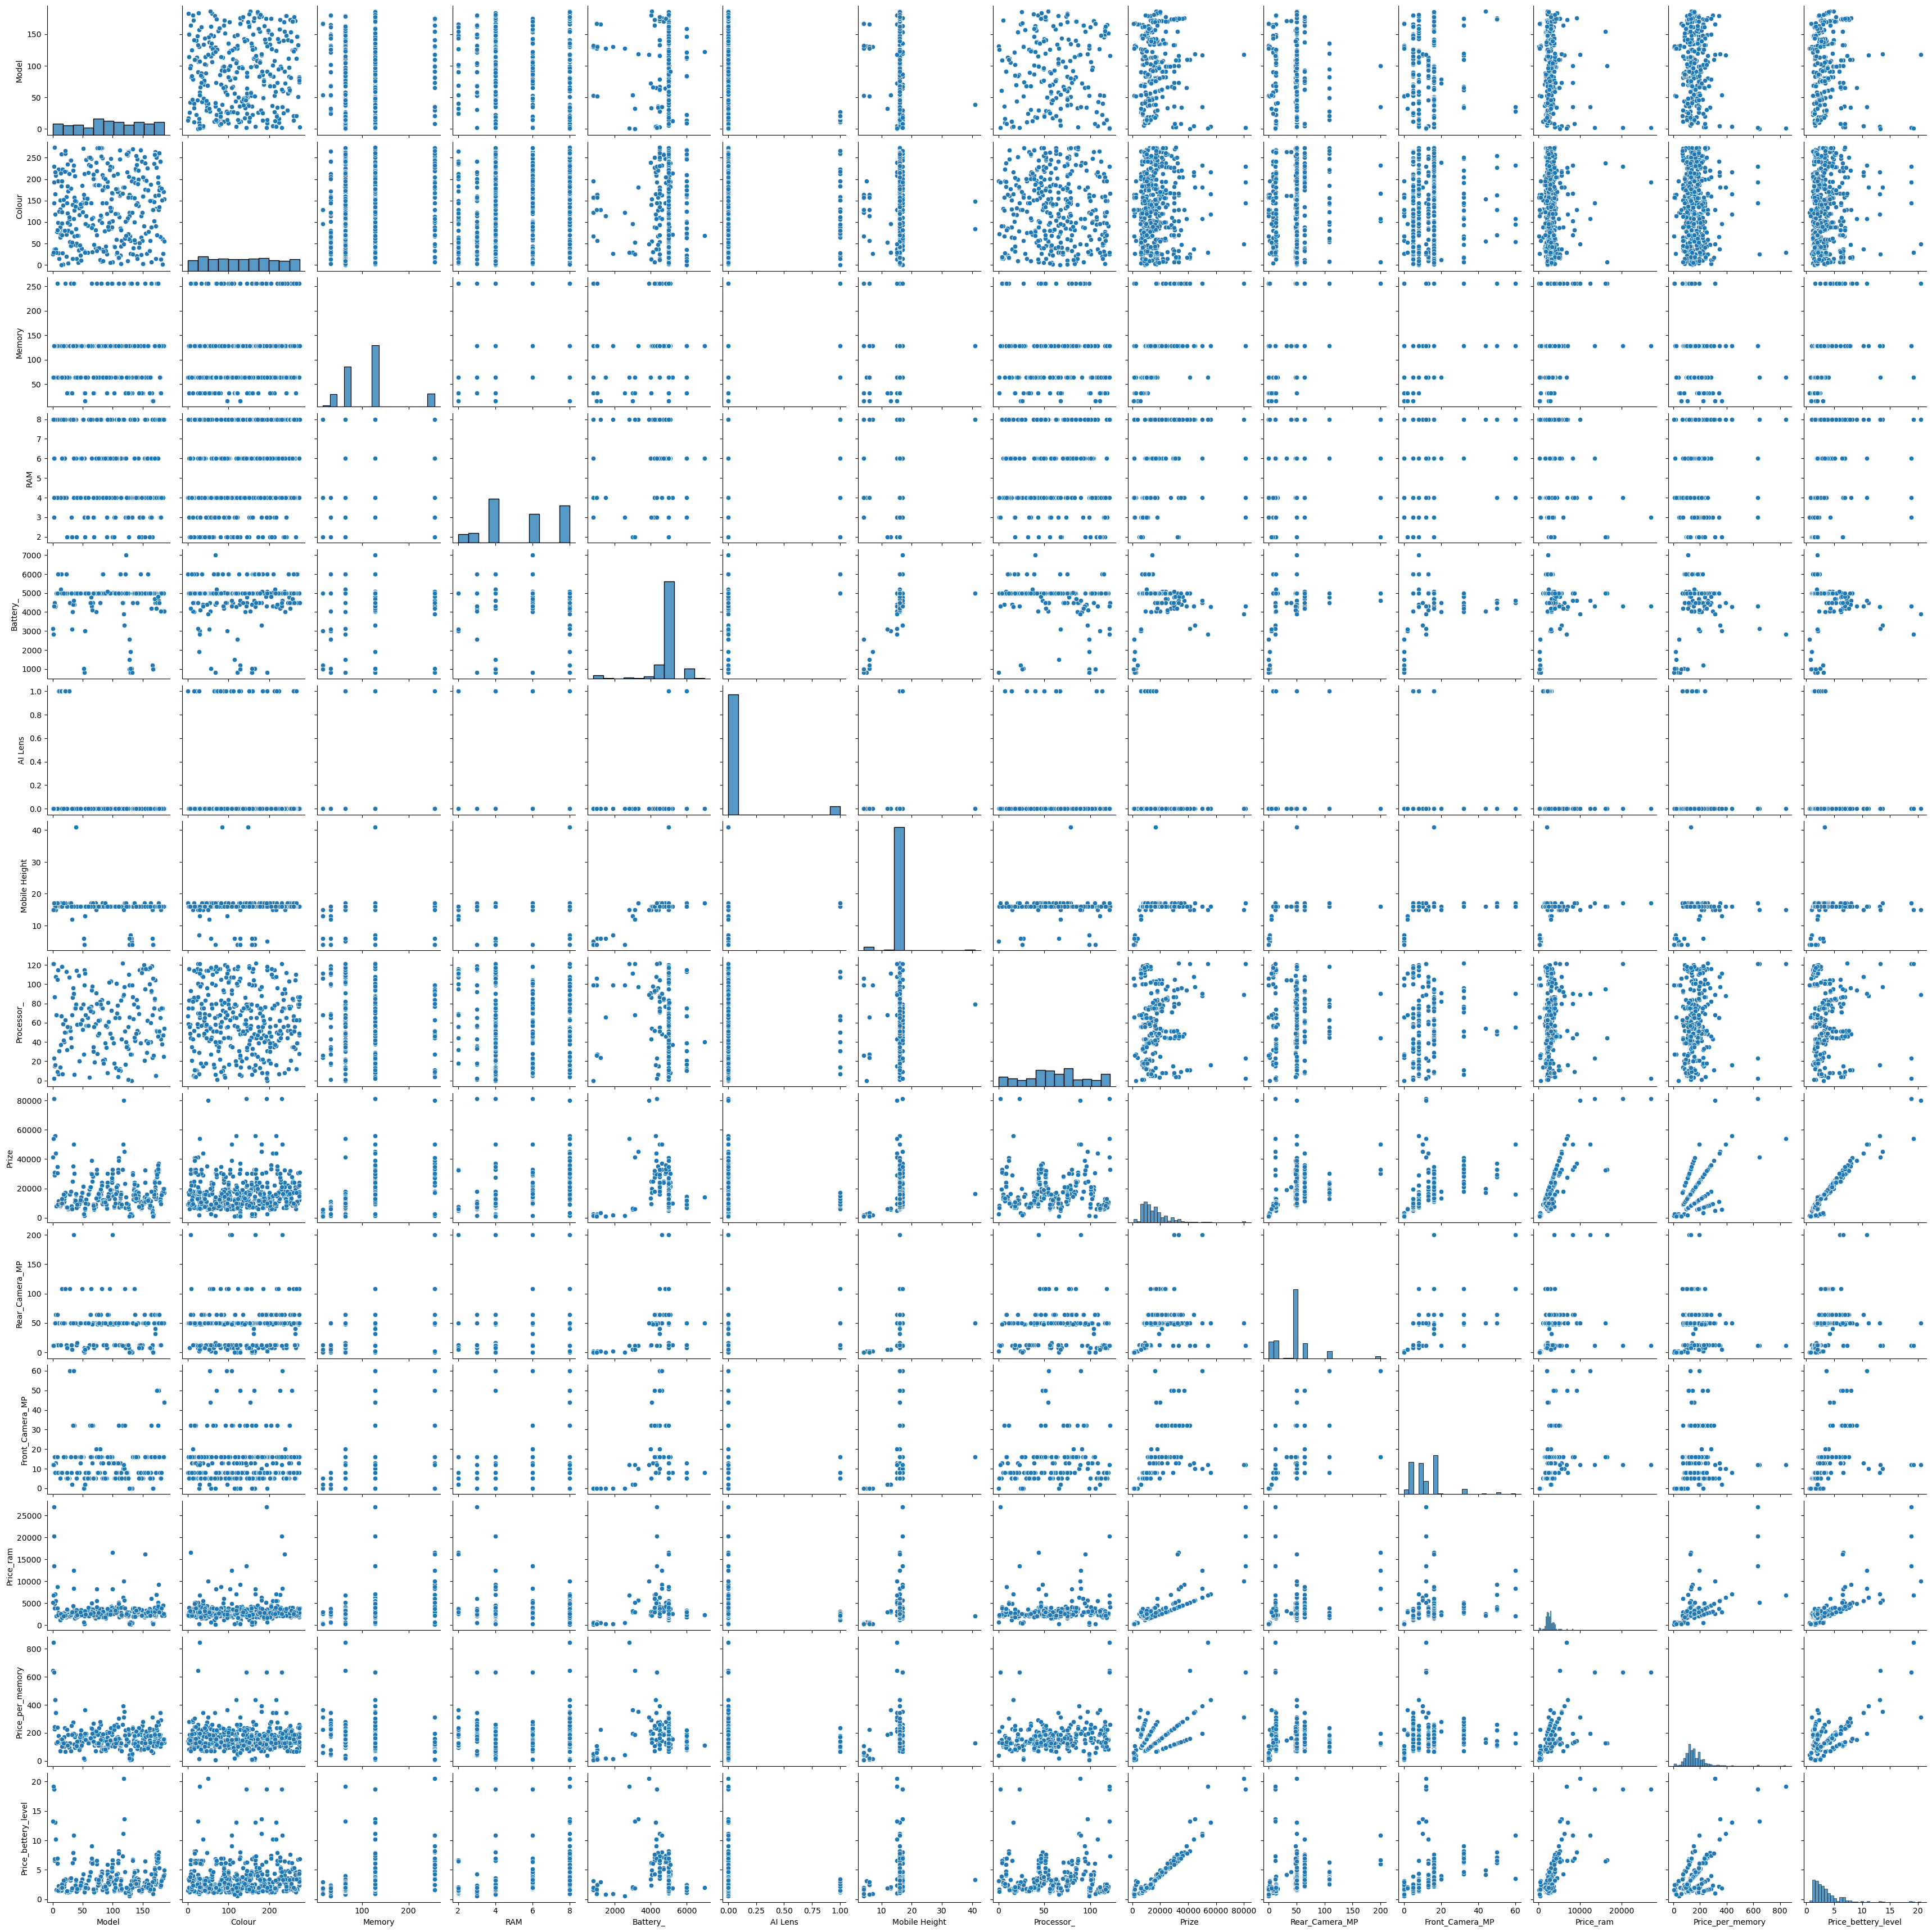

In [238]:
#sns.pairplot(df, vars=['Price_ram', 'Price_per_memory', 'Price_bettery_level', 'Prize'])
plt.show()
plt.suptitle("pairplot: Relationship vs Features and Mobile Prices",y=1.02)
plt.show()
sns.pairplot(df[['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'AI Lens','Mobile Height', 'Processor_', 'Prize', 'Rear_Camera_MP','Front_Camera_MP', 'Price_ram','Price_per_memory','Price_bettery_level']])

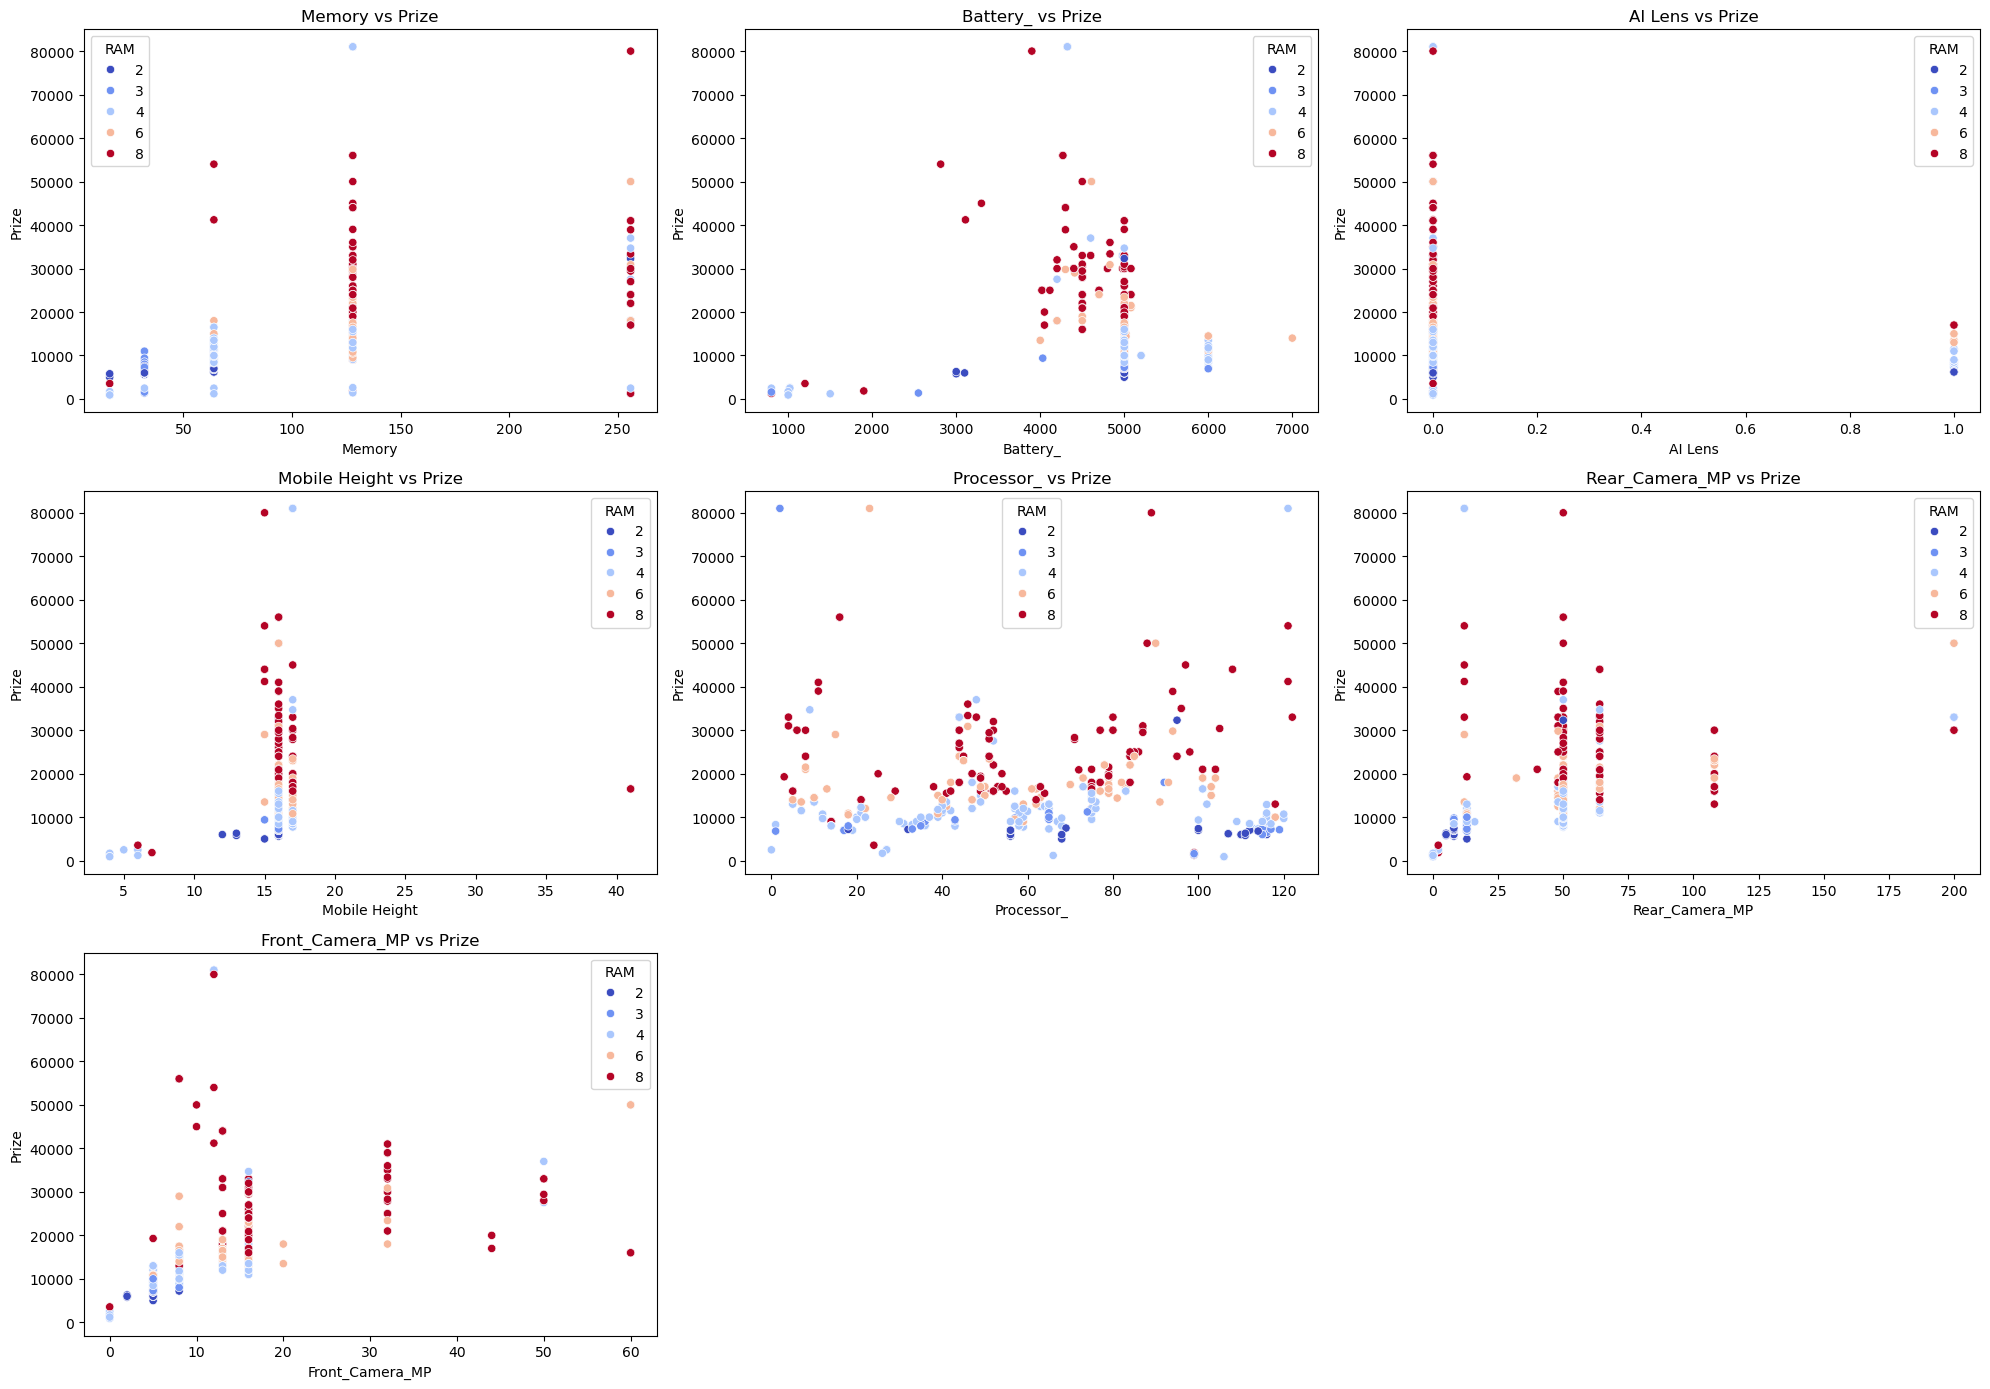

In [252]:
features = ['Memory', 'Battery_', 'AI Lens', 'Mobile Height', 'Processor_', 'Rear_Camera_MP', 'Front_Camera_MP']

plt.figure(figsize=(20, 14))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=col, y='Prize', hue='RAM', palette='coolwarm')  # Check if 'Prize' and 'RAM' are correct column names
    plt.title(f'{col} vs Prize')
    plt.tight_layout()

plt.show()

<h1>
Insight of Scater 
    
# 1. Memory & Price
. Phones with higher memory (128GB, 256GB) have higher prices.
.Budget-friendly models(32GB, 64GB) are more common in lower price segments.
# 2. Processor & Price
.Premium Processsor significantly increse price.
Low -end processors are mostly found in budget phones.
# 3. Mobile Height & Price
. No clear relationship . Mobile height does not impact price significantly
# 4. Front camera & Price 
phones focused on selfies have higher MP front cameras and are mid to high range
# 5. Rear camera & Price
Higher MP rear cameras are usually found inexpensive models


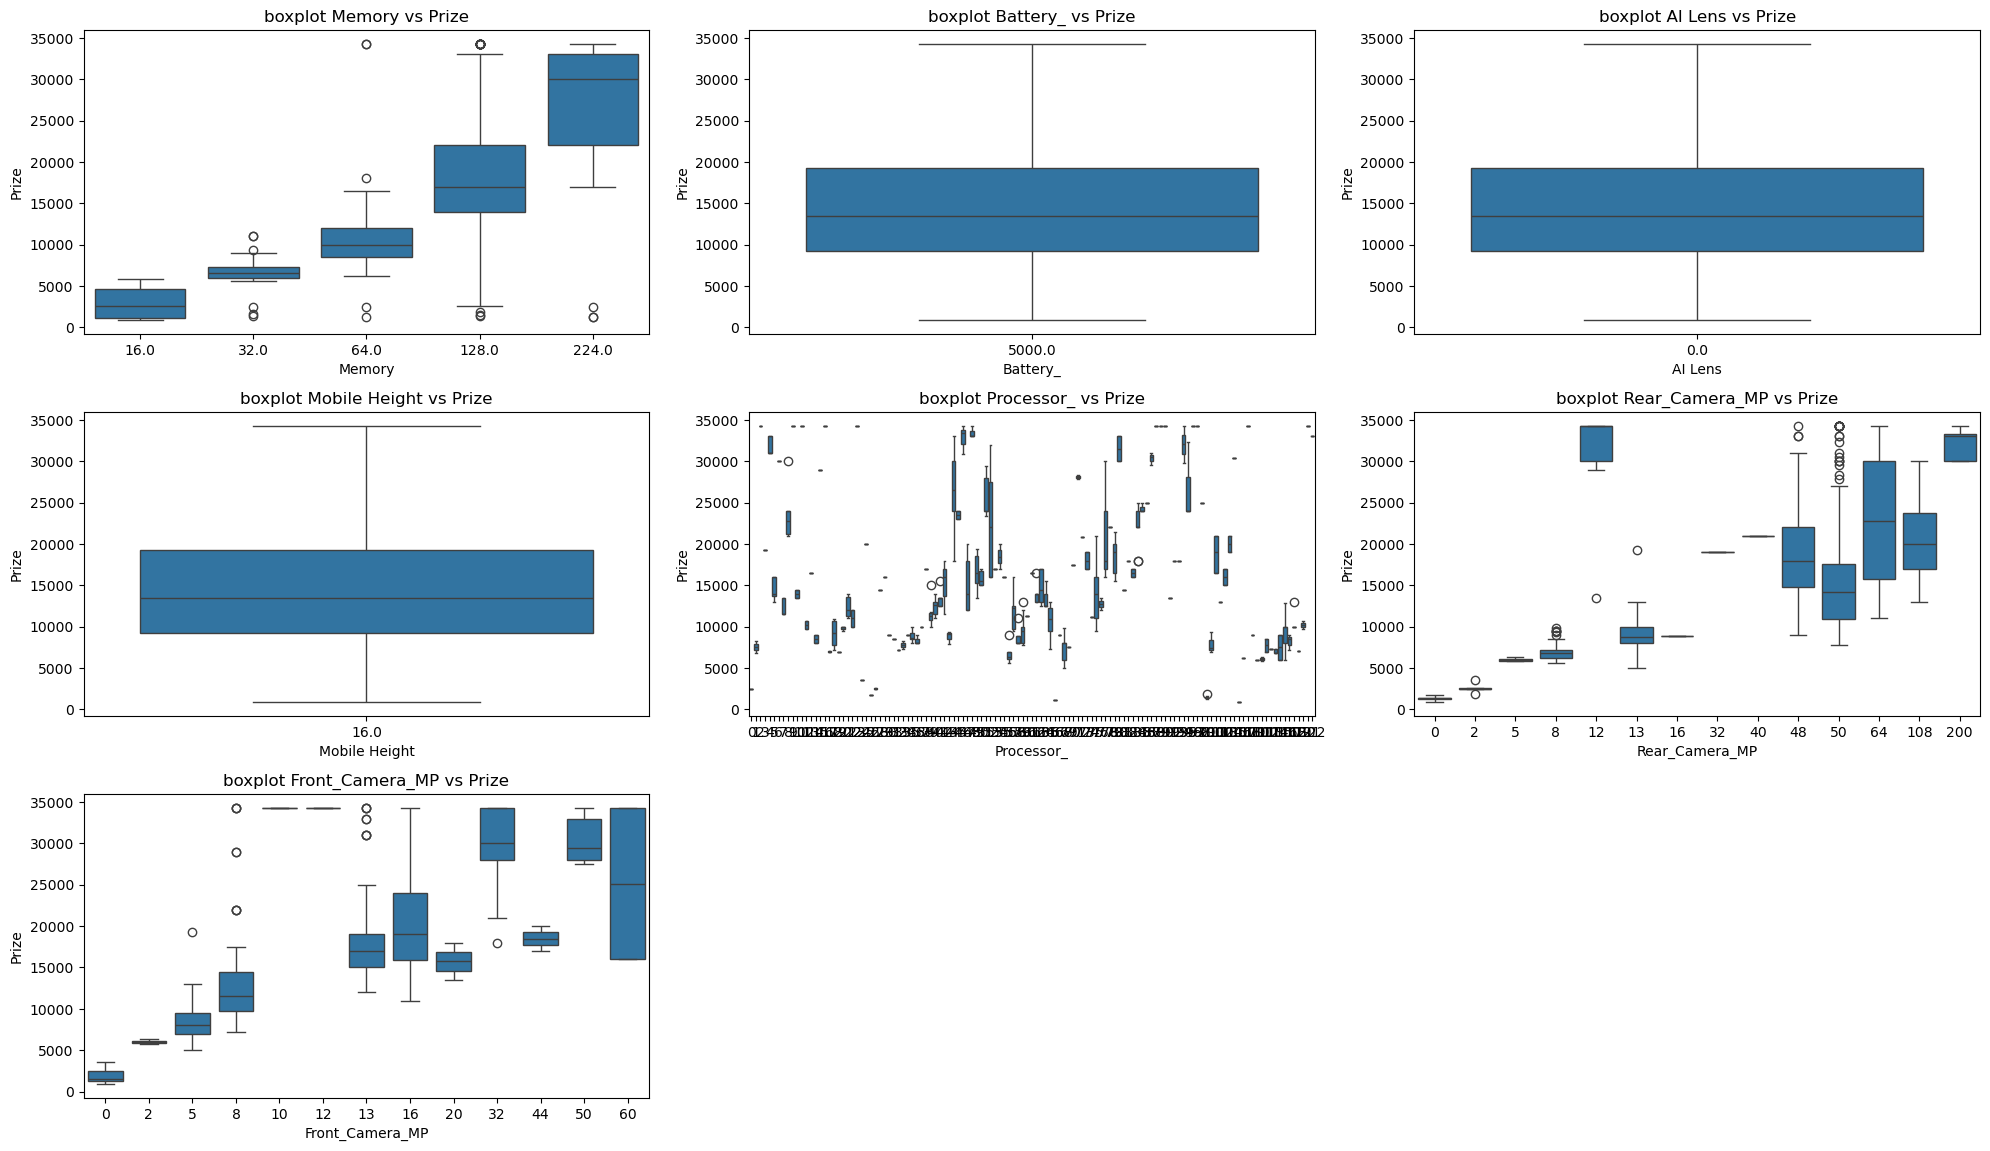

In [262]:
#features = ['Memory', 'Battery_', 'AI Lens', 'Mobile Height', 'Processor_', 'Rear_Camera_MP', 'Front_Camera_MP']

plt.figure(figsize=(20, 15))

for i, col in enumerate( ['Memory', 'Battery_', 'AI Lens', 'Mobile Height', 'Processor_', 'Rear_Camera_MP', 'Front_Camera_MP'],1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col], y=df['Prize'])#, hue='RAM', palette='coolwarm')  # Check if 'Prize' and 'RAM' are correct column names
    plt.title(f'boxplot {col} vs Prize')
    plt.tight_layout()

plt.show()

<Axes: ylabel='Count'>

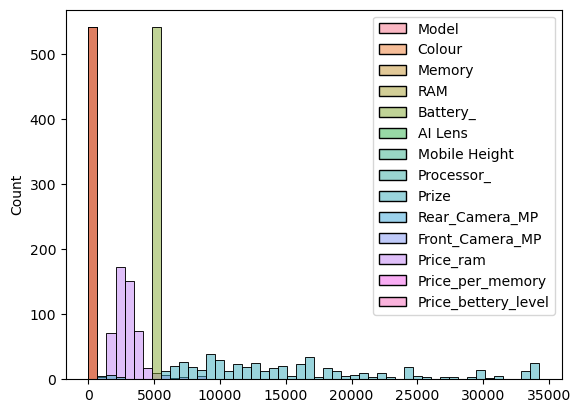

In [263]:
sns.histplot(df,bins=50)

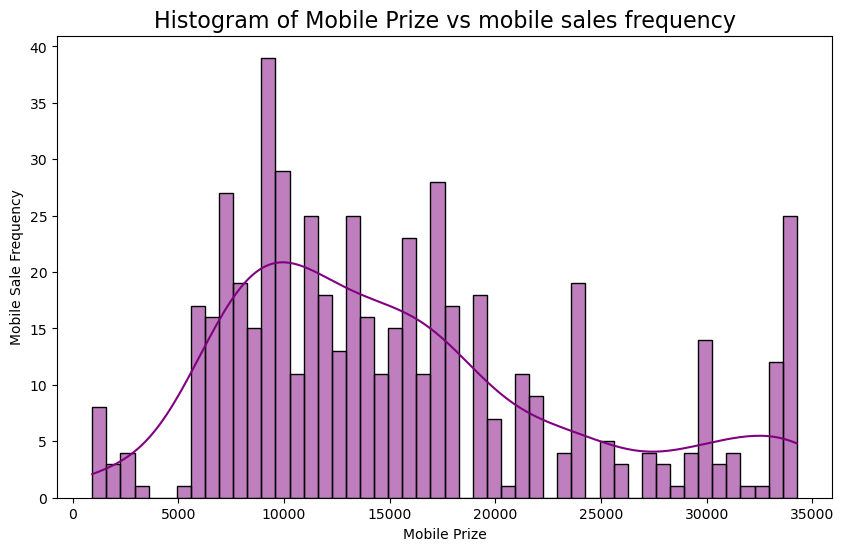

In [267]:
# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Prize'], bins=50, kde=True, color='purple')  # kde=True adds a density curve
plt.title('Histogram of Mobile Prize vs mobile sales frequency', fontsize=16)
plt.xlabel('Mobile Prize')
plt.ylabel('Mobile Sale Frequency')
plt.show()

# Insight from the Histogram Mobile price vs sales frequency
The highest sales are in the 8000-15000 range, indicating stronge consumer demand for budget and mid-range phones.
sales decline as price increses, with low sales in the 20000+ range.
some premium models 30000 still sell well, likely due to brnds loyalty and unique feutres.

In [347]:
correlation_matrix = df.corr()
corralation_with_saleprice = correlation_matrix['Prize'].sort_values(ascending=False)
correlation_matrix.round(2)


Model  Colour  Memory   RAM  Battery_  AI Lens  \
Model             1.00    0.11    0.04  0.01     -0.09    -0.40   
Colour            0.11    1.00    0.04  0.06      0.03    -0.03   
Memory            0.04    0.04    1.00  0.63     -0.05    -0.09   
RAM               0.01    0.06    0.63  1.00     -0.10    -0.08   
Battery_         -0.09    0.03   -0.05 -0.10      1.00     0.15   
AI Lens          -0.40   -0.03   -0.09 -0.08      0.15     1.00   
Mobile Height    -0.13    0.02    0.05  0.10      0.69     0.06   
Processor_        0.04   -0.07   -0.15 -0.11     -0.14    -0.11   
Prize            -0.08    0.04    0.57  0.53     -0.03    -0.15   
Rear_Camera_MP    0.00    0.05    0.53  0.44      0.20    -0.04   
Front_Camera_MP   0.05    0.04    0.50  0.49      0.03    -0.11   

                 Mobile Height  Processor_  Prize  Rear_Camera_MP  \
Model                    -0.13        0.04  -0.08            0.00   
Colour                    0.02       -0.07   0.04            0.05   
Memory                    0.05       -0.15   0.57            0.53   
RAM                       0.10       -0.11   0.53            0.44   
Battery_                  0.69       -0.14  -0.03            0.20   
AI Lens                   0.06       -0.11  -0.15           -0.04   
Mobile Height             1.00       -0.04   0.18            0.24   
Processor_               -0.04        1.00  -0.05           -0.10   
Prize                     0.18       -0.05   1.00            0.41   
Rear_Camera_MP            0.24       -0.10   0.41            1.00   
Front_Camera_MP           0.22       -0.04   0.53            0.51   

                 Front_Camera_MP  
Model                       0.05  
Colour                      0.04  
Memory                      0.50  
RAM                         0.49  
Battery_                    0.03  
AI Lens                    -0.11  
Mobile Height               0.22  
Processor_                 -0.04  
Prize                       0.53  
Rear_Camera_MP              0.51  
Front_Camera_MP             1.00

<h1 Correlation of Insight h1>
Insight of correlation 

<h2 Correlation h2>
1. Price vs RAM & Memory

The correlation between Price and RAM is 0.53 , indicating a moderate postive relationship this means phones with higher RAM tend to have prices.
The corraltion between Price and Memory is 0.57 , which is a strong postive with larger internal storage genrally have higher prices.

# 2. Price vs Processor & AI Lens:

. The corralation between Price and Processor is -0.5 , indicating a weak relationship. this suggests that the procesor has little impact on price.

The corraltion between Price and A?I LEns is -0.15, which is almost negligible , meaning the presence of an AI lens has no significant effect on price.

# 3. Price Vs Battery & Battery Level:

The corralation between Price and BAttery is -0.3, which is very weak , i suggesting that battery capacity alone does not influence price significantly.

However , the corralation between Price and Battery Level is 0.97, which is very strong postive corration, this implied that battery performances or eficiency has a major impact on price.

# 4. Price vs Price per RAM & Price per Memory:

The corralation between price and price per RAM is 0.74 , indicating a strong postive relationship.

the corration between Price and Price per Memory is 0.55, showing a moderate positive relationship.

# Conclusion:

RAM and Memory significanlty impact phone prices.
BAttery Level has the strongest influence on price.

Processor and AI Lens have little to no effart on price.

price per Ram and Price per Memory also show a strong corralation with price.

<h1 style='color:Blue' align='center'>Model Building </h1>

# Data Preprocessing

In [39]:
X = df.drop("Prize", axis=1)
Y = df["Prize"]

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [41]:
X_train

Model  Colour  Memory  RAM  Battery_  AI Lens  Mobile Height  Processor_  \
244    166     128    16.0  8.0    5000.0      0.0           16.0          24   
540     59     215   128.0  4.0    5000.0      0.0           16.0          57   
417      4     165   128.0  8.0    5000.0      0.0           16.0          16   
509     96       5   128.0  6.0    5000.0      0.0           16.0          49   
353    126      72    64.0  4.0    5000.0      0.0           16.0           1   
..     ...     ...     ...  ...       ...      ...            ...         ...   
71     147      64    32.0  3.0    5000.0      0.0           16.0         116   
106     69      48    32.0  3.0    5000.0      0.0           16.0          56   
270     14       0    64.0  4.0    5000.0      0.0           16.0          67   
435    102      44    32.0  2.0    5000.0      0.0           16.0          18   
102    135     100   128.0  8.0    5000.0      0.0           16.0          79   

     Rear_Camera_MP  Front_Camera_MP    Price_ram  Price_per_memory  \
244               2                0   443.625000        221.812500   
540              50                8  3999.750000        124.992188   
417              50                8  4283.125000        267.695312   
509              50               16  3165.000000        148.359375   
353              13                5  2072.000000        129.500000   
..              ...              ...          ...               ...   
71                8                5  2166.333333        203.093750   
106               8                5  2099.666667        196.843750   
270              50                8  2249.750000        140.609375   
435              13                5  3595.000000        224.687500   
102             108               16  2499.875000        156.242188   

     Price_bettery_level  
244               0.7098  
540               3.1998  
417               6.8530  
509               3.7980  
353               1.6576  
..                   ...  
71                1.2998  
106               1.2598  
270               1.7998  
435               1.4380  
102               3.9998  

[432 rows x 13 columns]

In [42]:
Y_train

244     3549.0
540    15999.0
417    34265.0
509    18990.0
353     8288.0
        ...   
71      6499.0
106     6299.0
270     8999.0
435     7190.0
102    19999.0
Name: Prize, Length: 432, dtype: float64

# Linear Regrasseion

In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train,Y_train) # ye ek sath pura

LinearRegression()

In [45]:
Y_pred = model.predict(X_test)
Y_pred

array([ 8499.,  6299., 19499., 10999., 12599., 14499.,  9999., 17999.,
       29499.,  9790.,  8999., 29999., 19499., 16499., 32999., 16999.,
        9999., 15999., 23999., 18999.,  6999., 17999.,  9999., 17999.,
       28298., 11999.,  8049., 23999.,  9499.,  8069., 17499., 16999.,
        1699., 16499., 17999., 34265., 10943., 15999., 16999.,  8999.,
       12999., 34265., 23999., 12999.,  5999., 13999., 16999.,  9499.,
        9790.,  6599., 15999., 29418.,  9999.,  7999.,  8460., 17999.,
       19999., 27999., 11980., 11999., 11970., 25999.,  6299., 34265.,
        5999.,  8999., 16499., 21499.,  8999., 14490.,  9999., 16999.,
       17999., 14999.,  6499.,  1199., 10499., 17999., 29999., 13999.,
        8049.,  7749., 11999., 14999.,  7299.,  7999., 31989., 15999.,
       18999., 13490., 14490.,  7961., 29999.,  6299., 11999.,  6299.,
       17999.,  5649., 21999., 10989.,  6999., 10999., 11999., 16999.,
        9999.,  7999.,  9999.,  8999.,  1599.])

# Evaluation

In [46]:
print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)
print("MSE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))
print("R2 Score:", r2_score(Y_test,Y_pred))

Coefficients: [-1.70008459e-13  1.26121336e-13 -1.04272146e-12 -6.19130094e-12
 -9.09494702e-13  1.13686838e-13  5.68434189e-14 -3.85802501e-14
 -1.44257783e-12  1.50345847e-11  0.00000000e+00 -7.68052288e-13
  5.00000000e+03]
Intercept: 4.700268618762493e-09
MSE: 6.433423416830018e-11
MSE: 1.0507709945220237e-20
R2 Score: 1.0


# visulization (Only 1 features)

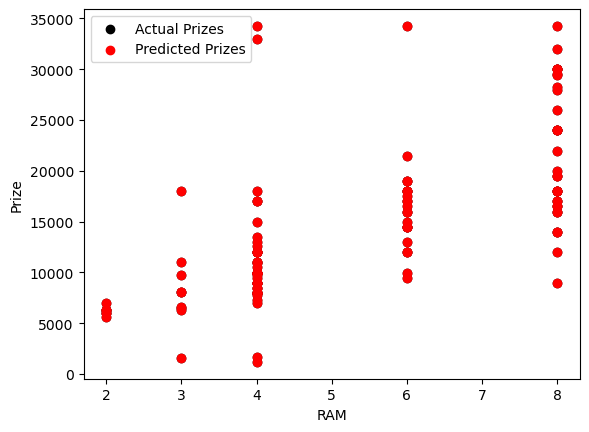

In [48]:
plt.scatter(X_test['RAM'],Y_test,color="Black",label="Actual Prizes")
plt.scatter(X_test["RAM"],Y_pred,color="red",label="Predicted Prizes")
#plt.plot(X_test,model.predict(X_test),color = 'blue') # line plot ke liy
plt.xlabel('RAM')
plt.ylabel('Prize')
plt.legend()
plt.show()

1. Model Performance Analysis

Scatter plot me actual prices aur predicted prices dikh rahe hain.

Agar points linearly aligned nahi hain, toh iska matlab hai ki model predictions me error zyada hai.


2. Possible Underfitting

Agar predicted values data ke trend ko acche se follow nahi kar rahe, toh model underfit ho sakta hai.

Underfitting ka matlab hai ki model complexity kam hai aur important patterns ko capture nahi kar raha.


3. Feature Engineering Ki Zaroorat

Multiple linear regression ka performance improve karne ke liye important features select karne chahiye.


# Multiple Linear 


In [379]:
#theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y)

# Print coefficients and intercept
print("Coefficients:", theta[1:])
print("Intercept:", theta[0])


Coefficients: [-9.01495687e-01 -8.52191009e+01  4.26573205e+03 -7.10072791e-01
  0.00000000e+00 -2.55901825e+02  8.13438018e+00  2.59336908e+01
  2.93981004e+02]
Intercept: 17.139807856521507


In [386]:
#Predication
X_new = np.array([1, 6000, 4, 0, 0, 0, 0, 0, 0, 0])  # 10 features (1 for the intercept term and 9 features)
predicted_prize = X_new.dot(theta)  # Dot product of the feature vector and learned coefficients
print("Predicted Prize:", predicted_prize)


Predicted Prize: -5732.710718280986


#  Logistic Regression

Using sklearn

In [388]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [389]:
#model fit 
model.fit(X_train,Y_train)

LogisticRegression()

In [390]:
X_train

Model  Colour  Memory  RAM  Battery_  AI Lens  Mobile Height  Processor_  \
244    166     128    16.0  8.0    5000.0      0.0           16.0          24   
540     59     215   128.0  4.0    5000.0      0.0           16.0          57   
417      4     165   128.0  8.0    5000.0      0.0           16.0          16   
509     96       5   128.0  6.0    5000.0      0.0           16.0          49   
353    126      72    64.0  4.0    5000.0      0.0           16.0           1   
..     ...     ...     ...  ...       ...      ...            ...         ...   
71     147      64    32.0  3.0    5000.0      0.0           16.0         116   
106     69      48    32.0  3.0    5000.0      0.0           16.0          56   
270     14       0    64.0  4.0    5000.0      0.0           16.0          67   
435    102      44    32.0  2.0    5000.0      0.0           16.0          18   
102    135     100   128.0  8.0    5000.0      0.0           16.0          79   

     Rear_Camera_MP  Front_Camera_MP  
244               2                0  
540              50                8  
417              50                8  
509              50               16  
353              13                5  
..              ...              ...  
71                8                5  
106               8                5  
270              50                8  
435              13                5  
102             108               16  

[432 rows x 10 columns]

In [135]:
# Initialize and fit a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Estimate probabilities on the test set
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
print("Probabilities for class 1:", y_prob)

Probabilities for class 1: [1.26615454e-014 1.38286331e-026 6.19318987e-018 9.15239797e-022
 1.84246863e-026 1.12609817e-017 9.17824994e-019 3.66129551e-048
 1.71832613e-033 5.28831673e-028 1.01442685e-004 1.73674131e-034
 6.18638124e-018 8.53547792e-014 3.03441172e-133 1.34137226e-022
 6.09408940e-010 3.49690356e-013 7.12952787e-025 6.98718925e-027
 4.87769253e-031 7.46348717e-016 1.27336784e-018 9.14478239e-025
 1.67920788e-031 4.55282700e-008 6.20205461e-021 1.12438847e-024
 2.23034077e-017 2.19504500e-013 1.51773639e-023 8.58404911e-043
 7.74620221e-002 7.75286162e-014 4.35769250e-082 2.98383640e-141
 2.03757213e-021 9.02496605e-021 1.12361510e-022 5.65141417e-016
 6.09029563e-015 7.98264052e-076 8.87831702e-025 1.06730545e-027
 1.07919469e-024 1.64614312e-010 1.39615988e-014 8.67753318e-009
 3.91430579e-018 1.83798215e-015 1.34404527e-020 1.65137286e-033
 6.94293060e-019 2.59297052e-013 2.49720141e-014 1.04801104e-024
 1.05231605e-018 2.96816503e-031 1.12723479e-024 4.26739174e-01

In [392]:
Y_train

244     3549.0
540    15999.0
417    34265.0
509    18990.0
353     8288.0
        ...   
71      6499.0
106     6299.0
270     8999.0
435     7190.0
102    19999.0
Name: Prize, Length: 432, dtype: float64

In [393]:
model.predict(X_test)

array([ 8999.,  9499., 16999., 11999., 19999., 16999., 12499., 12999.,
       16999.,  8499., 34265., 34265., 16999., 34265., 29999., 13999.,
        9999., 14499., 23999., 14499.,  8999., 20999., 10499., 12999.,
       15999., 34265.,  5999., 23999., 12499., 11999., 16999., 16999.,
       11999., 14499., 32999.,  6199., 10499., 14499., 12999.,  8999.,
       34265., 29999., 20999., 15999.,  7999., 23999., 29999., 15999.,
        9999.,  9499., 18999., 32999.,  6999.,  8999.,   920.,  9999.,
       23999., 23999.,  9999., 13999.,  9999., 15999.,  6999., 32999.,
        6499.,  9499., 13999., 13999., 14999., 13999.,  8999., 16999.,
       34265., 12499.,  7499.,  9499., 20999., 23999., 29999., 23999.,
        6499.,  9999., 11999.,  9999.,  6199.,  8999., 23999., 13999.,
       16999., 15999., 15999.,  6599., 34265.,  6299., 12499.,  9499.,
       32999.,  8999., 23999.,  7499.,  8499.,  8999.,  8999., 29999.,
        8999.,  7999., 11999.,  6199.,  5999.])

In [394]:
model.score(X_test,Y_test)

0.09174311926605505

In [402]:
#feture scalling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [403]:
X_train

array([[ 1.31833347, -0.0759892 , -1.76134343, ..., -1.14635449,
        -1.44379497, -1.34300094],
       [-0.72077131,  1.01324723,  0.38722556, ..., -0.13955129,
         0.1396679 , -0.44870205],
       [-1.76890929,  0.38724928,  0.38722556, ..., -1.39042799,
         0.1396679 , -0.44870205],
       ...,
       [-1.57833874, -1.67854394, -0.84052815, ...,  0.16554059,
         0.1396679 , -0.44870205],
       [ 0.09868201, -1.12766574, -1.45440501, ..., -1.32940961,
        -1.08091806, -0.78406414],
       [ 0.7275648 , -0.42654804,  0.38722556, ...,  0.53165085,
         2.05301887,  0.44559685]])

In [404]:
X_test

array([[-1.63550991, -0.11354907, -0.84052815, ..., -0.93279017,
        -1.08091806, -0.44870205],
       [-0.13000264, -0.18866883, -1.45440501, ..., -0.17006047,
        -1.24586211, -0.78406414],
       [-0.32057318, -0.23874866,  0.38722556, ...,  0.53165085,
         0.60151124,  0.44559685],
       ...,
       [-0.20623085,  0.57504867, -0.84052815, ..., -1.20737286,
         0.1396679 , -0.44870205],
       [-1.67362402,  0.76284805, -0.84052815, ...,  1.62998161,
        -1.08091806, -0.44870205],
       [ 0.67039364, -0.15110895, -1.45440501, ...,  1.14183461,
        -1.50977259, -1.34300094]])

In [426]:
#Prediction aou Acuuracy
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print ("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("Classification Report:\n",classification_report(Y_test,Y_pred))

Model Accuracy: 65.14%
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]
Classification Report:
               precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         0
      1199.0       0.00      0.00      0.00         1
      1375.0       0.00      0.00      0.00         0
      1599.0       0.00      0.00      0.00         1
      1699.0       0.00      0.00      0.00         1
      5649.0       0.00      0.00      0.00         1
      5999.0       0.50      0.50      0.50         2
      6299.0       0.00      0.00      0.00         4
      6499.0       0.50      1.00      0.67         1
      6599.0       0.25      1.00      0.40         1
      6999.0       0.67      1.00      0.80         2
      7299.0       0.50      1.00      0.67         1
      7749.0       1.00      1.00      1.00         1
      7961.0       0.00      0.00      0.00         1
   

# Support vector Machine (SVM)
**Linear SVM Classification**

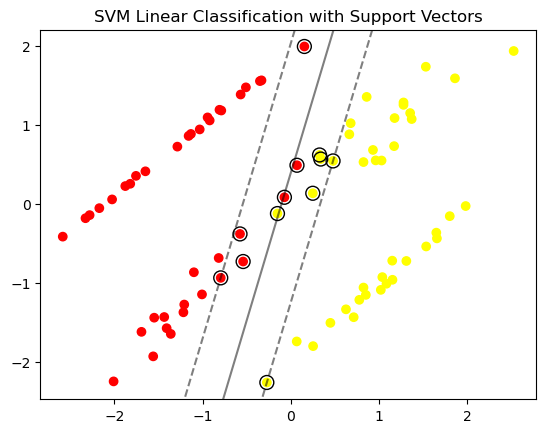

In [589]:
# Create and fit the SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Plot the decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the decision function
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30),
                     np.linspace(ylim[0], ylim[1], 30))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contour(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, colors='k', linestyles=['--', '-', '--'])

# Mark support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.title("SVM Linear Classification with Support Vectors")
plt.show()


1. Decision Boundary Analysis

Plot me SVM ka decision boundary aur margin lines clearly dikh rahi hain.

Model do classes ko separate karne ki koshish kar raha hai, jisme kuch support vectors bhi dikh rahe hain (jo margin ke kareeb hain).


2. Soft Margin Classification

Yeh soft margin SVM hai, matlab model thoda flexibility allow kar raha hai misclassification ke liye.

Agar kuch points galat classify ho rahe hain, toh C hyperparameter adjust karke margin ko tighter ya looser kiya ja sakta hai.


3. Data Distribution Aur Linearity

Agar classes properly separate ho rahi hain, toh linear SVM sahi choice hai.

Agar kuch overlapping points hain ya non-linearity dikh rahi hai, toh kernel trick (RBF, polynomial, etc.) ka use karna better hoga.


4. Misclassified Points Ka Impact

Jo points galat classify ho rahe hain, unka impact model ki accuracy par ho sakta hai.

Model ka accuracy, precision, recall, aur F1-score check karna zaroori hoga taaki performance ka idea mile.


Agar aap model tuning ya hyperparameter optimization karna chahte hain, toh C aur kernel type ko modify karke better results paa sakte hain.

# soft margin classification

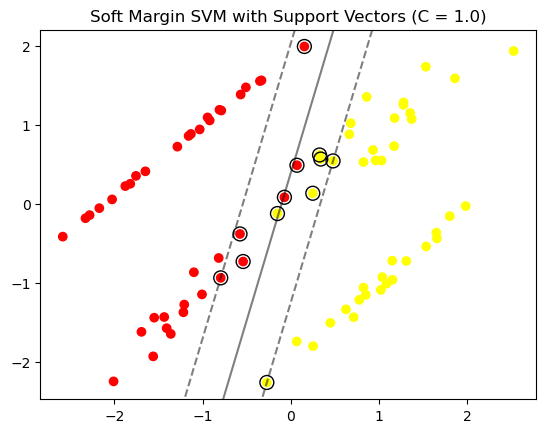

Test set accuracy: 0.95


In [590]:

# Create and fit the soft margin SVM classifier
C_value = 1.0  # You can experiment with different values of C
clf = SVC(kernel='linear', C=C_value)
clf.fit(X_train, y_train)

# Plot the decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the decision function
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30),
                     np.linspace(ylim[0], ylim[1], 30))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contour(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, colors='k', linestyles=['--', '-', '--'])

# Mark support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.title("Soft Margin SVM with Support Vectors (C = {})".format(C_value))
plt.show()

# Evaluate the model on the test set
accuracy = clf.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.2f}")

# non line SVM

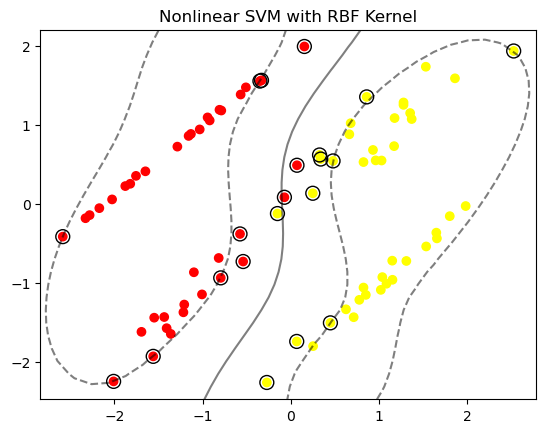

Test set accuracy: 1.00


In [591]:
# Gussion RBF Kernal
# Create and fit the nonlinear SVM classifier with RBF kernel
clf = SVC(kernel='rbf', C=1.0, gamma='scale')  # RBF kernel with gamma = scale (default value)
clf.fit(X_train, y_train)

# Plot the decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the decision function
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30),
                     np.linspace(ylim[0], ylim[1], 30))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contour(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, colors='k', linestyles=['--', '-', '--'])

# Mark support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.title("Nonlinear SVM with RBF Kernel")
plt.show()

# Evaluate the model on the test set
accuracy = clf.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.2f}")

# kernal 
**polynominal**

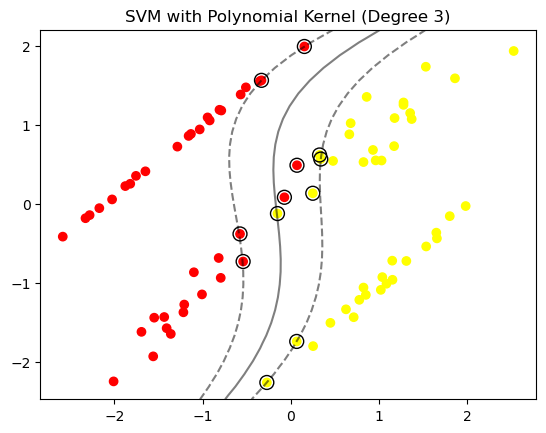

Test set accuracy: 1.00


In [594]:
# Create and fit the SVM classifier with Polynomial kernel (degree=3)
clf = SVC(kernel='poly', C=1.0, degree=3, coef0=1)  # degree=3 for cubic polynomial kernel
clf.fit(X_train, y_train)

# Plot the decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the decision function
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30),
                     np.linspace(ylim[0], ylim[1], 30))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contour(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, colors='k', linestyles=['--', '-', '--'])

# Mark support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.title("SVM with Polynomial Kernel (Degree 3)")
plt.show()

# Evaluate the model on the test set
accuracy = clf.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.2f}")

# Deciesion Trees
**Training and visulizing deision Tree**

In [599]:
# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.95


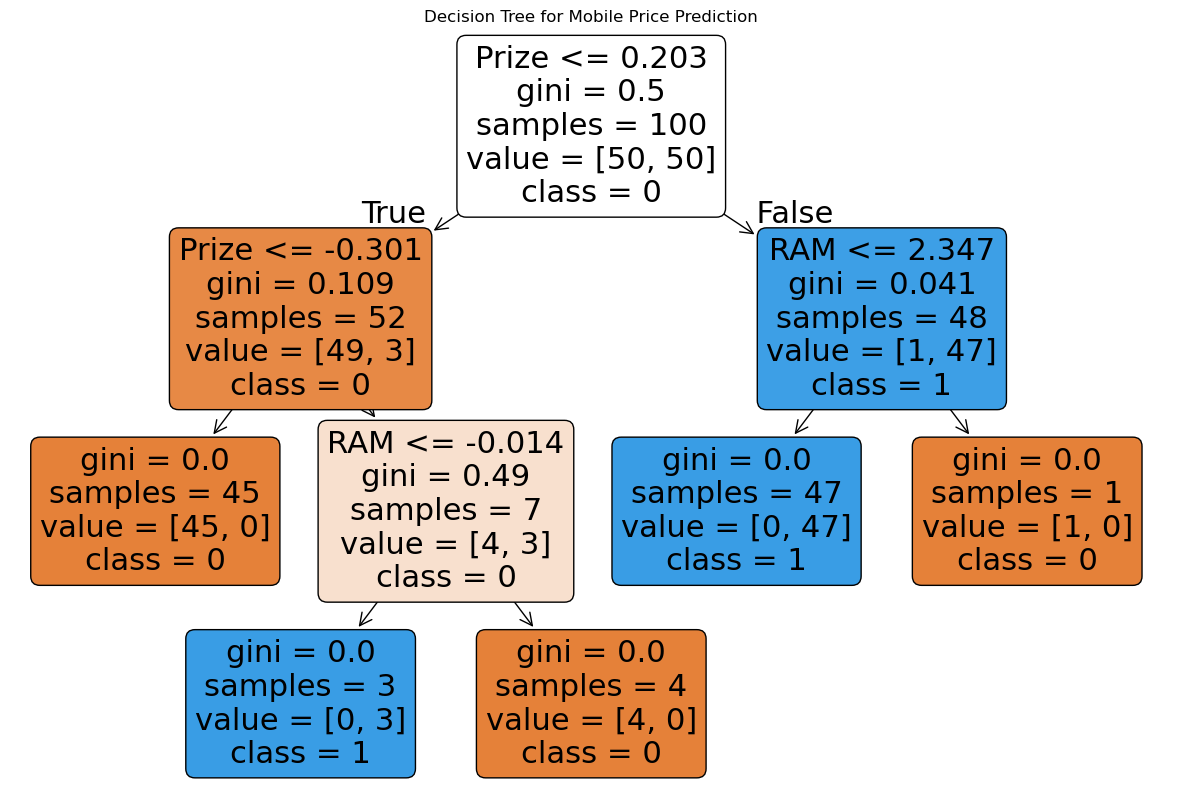

In [604]:
# Assume `X` and `y` are already defined
# Step 3: Train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Step 4: Visualize the Decision Tree
plt.figure(figsize=(15, 10))

# Corrected: Use np.unique(y) for class names
plot_tree(clf, filled=True, feature_names=['Prize', 'RAM'], 
          class_names=[str(i) for i in np.unique(y)], rounded=True)

plt.title("Decision Tree for Mobile Price Prediction")
plt.show()

In [605]:
# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Print the predictions
print("Predictions on the test set:", y_pred)

# Optionally: You can compare the predicted values with actual labels
print("Actual labels:", y_test)

Predictions on the test set: [0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0]
Actual labels: [0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0]


#  Estimating class probabilities

In [606]:
# Estimating class probabilities on the test set
y_prob = clf.predict_proba(X_test)

# Print the predicted probabilities for the first 5 samples in the test set
print("Predicted probabilities (first 5 samples):")
print(y_prob[:5])

Predicted probabilities (first 5 samples):
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
# Train a Decision Tree classifier (CART)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the trained decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=['Feature_1', 'Feature_2', 'Feature_3'], class_names=['Class 0', 'Class 1'], rounded=True)
plt.title("CART Decision Tree")
plt.show()

# Predict with the trained model
y_pred = clf.predict(X_test)

# Evaluate the performance
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Train a decision tree with Gini impurity

In [608]:
# Train a decision tree with Gini impurity
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# Train a decision tree with Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

# Predict and compare the performance
print("Accuracy with Gini impurity:", clf_gini.score(X_test, y_test))
print("Accuracy with Entropy:", clf_entropy.score(X_test, y_test))

Accuracy with Gini impurity: 0.95
Accuracy with Entropy: 0.95


# Regularized Linear Model / hyperameter

**Lasso Regression**

In [609]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model with L1 regularization
model = Lasso(alpha=0.01)  # alpha controls regularization strength
model.fit(X_train, y_train)


Lasso(alpha=0.01)

In [57]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train,Y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [56]:
feature_sel_model.get_support()

array([ True,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False])

In [66]:
# Lasso Model and feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train)

# Use SelectFromModel for feature selection
feature_sel_model = SelectFromModel(lasso, threshold="mean", max_features=10)
X_train_selected = feature_sel_model.transform(X_train)
# List selected feature names
selected_feat = X_train.columns[feature_sel_model.get_support()]
# Print results
print(f'Total features: {X_train.shape[1]}')  # Total features in the data
print(f'Selected features: {len(selected_feat)}')  # Number of selected features
# Number of coefficients shrunk to zero
print(f'Features with coefficient shrank to zero: {np.sum(lasso.coef_ == 0)}')
# Number of coefficients shrunk to zero
print(f'Features with coefficient shrank to zero: {np.sum(lasso.coef_ == 0)}')

# Print selected feature names
print(f'Selected features: {selected_feat}')

# Feature selection using Lasso (or any other model)
feature_selector = SelectFromModel(Lasso(alpha=0.01))
X_train_selected = feature_selector.fit_transform(X_train, Y_train)

# Transform the test data using the same feature selector
X_test_selected = feature_selector.transform(X_test)

# Train model on selected features
model14 = Lasso()
model14.fit(X_train_selected, Y_train)

# Predict using the selected features on the test set
model14_pred = model14.predict(X_test_selected)

# Display the predicted values
print('Predicted values (model14_pred):', model14_pred)


Total features: 13
Selected features: 1
Features with coefficient shrank to zero: 8
Features with coefficient shrank to zero: 8
Selected features: Index(['RAM'], dtype='object')
Predicted values (model14_pred): [10709.83792368  5156.84219793 21217.52677391  9883.57499488
 14449.07721216 18111.03244805 10624.35916911 14455.69529106
 20881.71094053  9175.70349396 21157.01163179 27748.12847446
 21218.51534088 21487.77905091 21726.28955862 17669.86974682
 14301.65849377 21164.85209173 20588.48869775 18039.40600452
  7826.74632673 21025.12495597 10424.66864151 17723.5308436
 21227.59502136 21470.19186508  6763.63575067 20621.7078244
 10708.40724185 10182.5765464  17921.60349381 15065.20939175
  6328.35116918 21436.73273761 20209.26535403 16126.96180757
 10465.87768077 18365.31020592 17731.16089886 10912.551863
 18255.7988094  25564.01206683 21030.8978777  14933.38691862
  5414.09095489 20492.43603693 28461.67695333 17937.63460382
 10705.20119598  6650.11320764 17716.6214227  27290.65151646


# Ridge

In [69]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model with L2 regularization
model = Ridge(alpha=1.0)  # alpha controls regularization strength
model.fit(X_train, Y_train)


Ridge()

In [71]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Train the model
ridge_model.fit(X_train, Y_train)

# Make predictions
Y_pred = ridge_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)

print("Mean Squared Error (MSE):", mse)
print("Model Coefficients:", ridge_model.coef_)


Mean Squared Error (MSE): 22182786.97032692
Model Coefficients: [-5.79806957e+00  9.88777272e-01  7.16278968e+01  1.49216785e+03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.54364556e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]


In [72]:
feature_sel_model = SelectFromModel(Ridge(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train,Y_train)

SelectFromModel(estimator=Ridge(alpha=0.005, random_state=0))

In [73]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False])

# ElasticNet

In [611]:
from sklearn.linear_model import ElasticNet

# Create an ElasticNet model with both L1 and L2 regularization
model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio controls the mix
model.fit(X_train, y_train)


ElasticNet()

In [75]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Train the model
elastic_net_model.fit(X_train, Y_train)

# Make predictions
Y_pred = elastic_net_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)

print("Mean Squared Error (MSE):", mse)
print("Model Coefficients:", elastic_net_model.coef_)

Mean Squared Error (MSE): 22179827.365910515
Model Coefficients: [-5.80102981e+00  9.88759338e-01  7.16728550e+01  1.49037812e+03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.54483758e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]


In [612]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier with max depth and min samples for split
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [76]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Example data generation for regression (you can replace this with your dataset)
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)  # Make sure to include the labels here

# Define parameters for XGBoost with early stopping
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1
}

# Train the model with early stopping
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtest, 'eval')],
    early_stopping_rounds=10
)

# Predict on the test data
y_pred = model.predict(dtest)
print("Predictions: ", y_pred)


[0]	eval-rmse:232.30828
[1]	eval-rmse:221.89280
[2]	eval-rmse:213.10534
[3]	eval-rmse:205.60530
[4]	eval-rmse:198.12999
[5]	eval-rmse:192.82298
[6]	eval-rmse:188.67419
[7]	eval-rmse:185.97046
[8]	eval-rmse:181.87469
[9]	eval-rmse:179.11409
[10]	eval-rmse:176.69740
[11]	eval-rmse:172.74877
[12]	eval-rmse:170.40652
[13]	eval-rmse:169.10630
[14]	eval-rmse:167.37500
[15]	eval-rmse:164.90298
[16]	eval-rmse:162.09134
[17]	eval-rmse:161.47223
[18]	eval-rmse:159.83350
[19]	eval-rmse:157.27780
[20]	eval-rmse:156.13846
[21]	eval-rmse:154.69400
[22]	eval-rmse:152.62860
[23]	eval-rmse:151.49843
[24]	eval-rmse:150.01548
[25]	eval-rmse:149.44785
[26]	eval-rmse:147.74137
[27]	eval-rmse:146.75534
[28]	eval-rmse:145.36952
[29]	eval-rmse:144.88164
[30]	eval-rmse:144.20398
[31]	eval-rmse:143.74229
[32]	eval-rmse:143.05255
[33]	eval-rmse:141.76122
[34]	eval-rmse:141.05231
[35]	eval-rmse:139.76998
[36]	eval-rmse:139.04306
[37]	eval-rmse:137.50663
[38]	eval-rmse:136.70129
[39]	eval-rmse:136.35815
[40]	eval-

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Set up parameter grid for Ridge regularization
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Create Ridge model and GridSearchCV
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best alpha value
print("Best alpha value:", grid_search.best_params_['alpha'])


Best alpha value: 0.1


In [78]:
# Apply Ridge regression with regularization
ridge_model = Ridge(alpha=1.0)  # Regularization strength
ridge_model.fit(X_train, y_train)

# Evaluate the model
print("Ridge Regression Coefficients:", ridge_model.coef_)
print("Model R^2 score:", ridge_model.score(X_test, y_test))

Ridge Regression Coefficients: [16.95562623 53.26139273  5.14229184 62.71297072 92.14122801 69.72025958
 86.01729963  9.90576126  3.25096976 69.63820737]
Model R^2 score: 0.9998018146709212


# Ensemble learing and RandomForest

In [631]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


# Label Encoding for categorical columns like 'Model' and 'Colour'
label_encoder = LabelEncoder()
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Colour'] = label_encoder.fit_transform(df['Colour'])
df['Processor'] = label_encoder.fit_transform(df['Processor'])


# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f"Predicted Prices: {y_pred}")
print(f"Actual Prices: {y_test.values}")
print(f"Mean Absolute Error: {mae:.2f}")



Predicted Prices: [16374.5]
Actual Prices: [11999]
Mean Absolute Error: 4375.50


# Bagging random forest

In [79]:
# Create the RandomForest Regressor (Bagging)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Bagging): {mae:.2f}")

Mean Absolute Error (Bagging): 121.95


In [82]:
# pasting Random

In [84]:
# Create the Decision Tree Regressor (Base model)
dt_model = DecisionTreeRegressor(random_state=42)

# Create the Bagging Regressor with pasting (bootstrap=False)
pasting_model = BaggingRegressor(estimator=dt_model, n_estimators=100, bootstrap=False, random_state=42)

# Fit the model
pasting_model.fit(X_train, y_train)

BaggingRegressor(bootstrap=False,
                 estimator=DecisionTreeRegressor(random_state=42),
                 n_estimators=100, random_state=42)

In [85]:
# Create the Bagging Regressor with pasting (bootstrap=True enables OOB)
bagging_model = BaggingRegressor(estimator=dt_model, n_estimators=100, bootstrap=True, oob_score=True, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Access the out-of-bag score
print(f"Out-of-Bag R^2 Score: {bagging_model.oob_score_:.4f}")

Out-of-Bag R^2 Score: 0.6583


# Patches and Subspaces 

In [91]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Random Patches: Use both bootstrap and random feature selection
random_patches_model = BaggingRegressor(estimator=dt_model,
                                        n_estimators=100,
                                        bootstrap=True,   # Enable bootstrap sampling
                                        max_features=0.5, # Use 50% of features for each model
                                        random_state=42,
                                        oob_score=True)   # Enable OOB score

# Train the model
random_patches_model.fit(X_train, y_train)

# Access the out-of-bag score
print(f"Out-of-Bag R^2 Score: {random_patches_model.oob_score_:.4f}")

Out-of-Bag R^2 Score: 0.5685


In [96]:


# Random Subspaces: Use only a random subset of features (without bootstrap sampling)
random_subspaces_model = BaggingRegressor(estimator=dt_model,
                                          n_estimators=100,
                                          bootstrap=False,  # No bootstrap sampling (use all samples)
                                          max_features=0.5, # Use 50% of features for each model
                                          random_state=42)

# Train the model
random_subspaces_model.fit(X_train, y_train)

# Since no bootstrap is used, we cannot compute OOB score. Instead, we can evaluate the model's performance using R^2 on the test set.
score = random_subspaces_model.score(X_test, y_test)
print(f"R^2 Score on Test Set: {score:.4f}")

R^2 Score on Test Set: 0.5746


# Random classification

In [104]:

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [110]:
# Step 4: Initialize and train the RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 121.95142325123629
Mean Squared Error (MSE): 21658.24876034072
R-squared (R²): 0.6376108786401311


In [116]:
# Step 4: Initialize and train the RandomForestClassifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.78
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]
Classification Report:
              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         0
      1199.0       0.00      0.00      0.00         1
      1375.0       0.00      0.00      0.00         0
      1599.0       0.00      0.00      0.00         1
      1699.0       0.00      0.00      0.00         1
      5649.0       1.00      1.00      1.00         1
      5999.0       1.00      1.00      1.00         2
      6299.0       1.00      1.00      1.00         4
      6499.0       1.00      1.00      1.00         1
      6599.0       1.00      1.00      1.00         1
      6999.0       1.00      1.00      1.00         2
      7299.0       1.00      1.00      1.00         1
      7499.0       0.00      0.00      0.00         0
      7749.0       1.00      1.00      1.00         1
      7961.0 

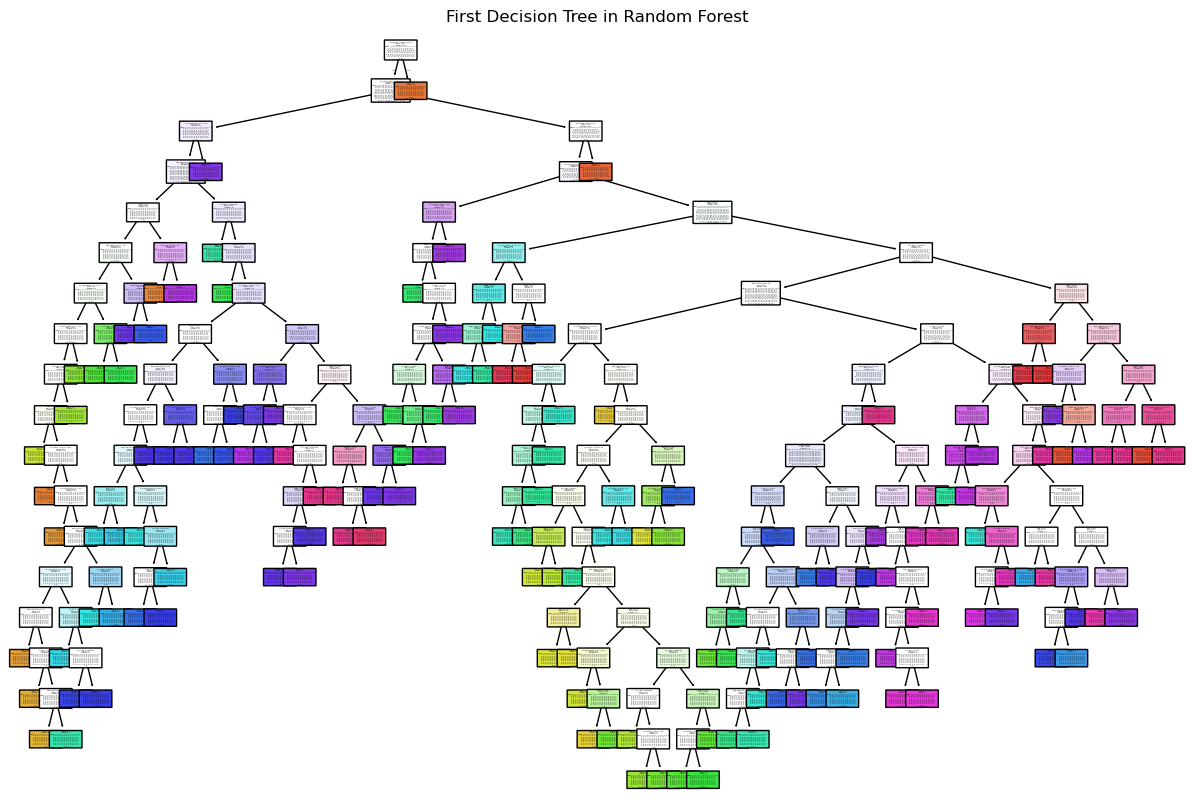

In [123]:
from sklearn.tree import plot_tree

# Visualize the first tree in the Random Forest
plt.figure(figsize=(15,10))
plot_tree(rf_classifier.estimators_[0], filled=True, feature_names=X.columns, class_names=[str(i) for i in y.unique()], rounded=True)
plt.title("First Decision Tree in Random Forest")
plt.show()


# Extra tree

In [125]:
from sklearn.ensemble import ExtraTreesClassifier
# Create the Extra Trees model
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
extra_trees.fit(X_train, y_train)

# Predict on the test set
y_pred = extra_trees.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Extra Trees Accuracy: {accuracy:.2f}")

Extra Trees Accuracy: 0.76


# Boosting

In [129]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create the AdaBoost model with a base estimator as a decision tree
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy:.2f}")


AdaBoost Accuracy: 0.07


# Gradient Boosting

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
# Create the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gradient_boosting_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gradient_boosting_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy:.2f}")

Gradient Boosting Accuracy: 0.68


In [574]:
#Gradient Boosting (XGBoost, LightGBM)
import xgboost as xgb

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to DMatrix (XGBoost's internal data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)  # Include y_test in the DMatrix for evaluation

# Define model parameters
params = {
    'objective': 'binary:logistic',  # Binary classification objective function
    'eval_metric': 'logloss',  # Evaluation metric
    'base_score': 0.5,  # Default base_score (between 0 and 1)
    'eta': 0.1,  # Learning rate
    'max_depth': 3  # Maximum tree depth
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Estimate probabilities on the test set
y_prob = model.predict(dtest)

# Print the probabilities for class 1
print("Probabilities for class 1:", y_prob)

# You can also convert probabilities to class labels if needed
y_pred = (y_prob > 0.5).astype(int)  # Threshold at 0.5 for binary classification
print("Predicted class labels:", y_pred)



Probabilities for class 1: [0.01212322 0.97516114 0.01212322 0.01212322 0.01212322 0.97516114
 0.01336551 0.01212322 0.01212322 0.01212322 0.01212322 0.97516114
 0.97516114 0.97516114 0.97516114 0.01212322 0.01212322 0.01321735
 0.01212322 0.01212322 0.97516114 0.01212322 0.97516114 0.01212322
 0.01212322 0.01212322 0.01212322 0.01212322 0.97516114 0.97516114]
Predicted class labels: [0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1]


In [134]:
# Stacking

In [133]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
base_learners = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42)

# Create the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the model
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {accuracy:.2f}")

Stacking Model Accuracy: 0.01


# Decision Boundaries

**Logistic Regression Decision Boundary**

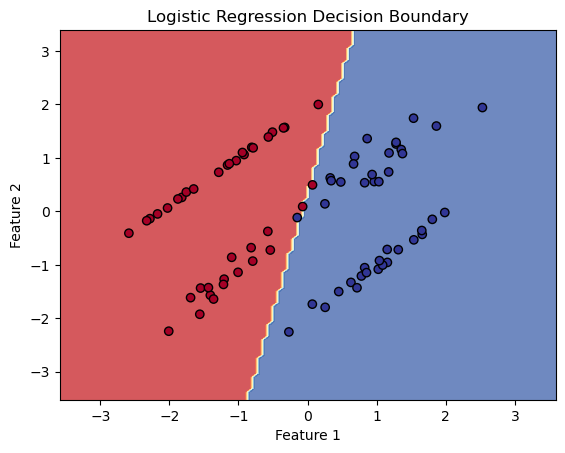

In [582]:
from sklearn.datasets import make_classification
# Create synthetic classification data (2 features for easy visualization)
X, y = make_classification(
    n_samples=100, 
    n_features=2,  # Only 2 features for easy visualization
    n_informative=2,  # Both features are informative
    n_redundant=0,  # No redundant features
    n_repeated=0,  # No repeated features
    random_state=42
)

# Assign custom feature names
feature_names = ['Prize', 'Model']

# Convert to DataFrame to assign feature names
X_df = pd.DataFrame(X, columns=feature_names)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Create a mesh grid to visualize decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Flatten the mesh grid for predictions
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class probabilities on the grid points
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.RdYlBu)

# Scatter plot of the training points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.RdYlBu)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



# Greadient Descent 

**Batch Greadient**

In [477]:
# Implementing Batch Gradient Descent (BGD)
class BatchGradientDescent:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        # Add intercept column (bias term) in X
        X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term (1) as the first column

        # Initialize weights (including the bias term)
        self.theta = np.zeros(X.shape[1])

        # Perform Gradient Descent
        for i in range(self.iterations):
            # Calculate the predictions
            predictions = np.dot(X, self.theta)

            # Compute the error (difference between predictions and actual values)
            error = predictions - y

            # Compute the gradient (partial derivatives)
            gradient = (1 / len(y)) * np.dot(X.T, error)

            # Update the weights (theta) using the gradient and learning rate
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        # Add intercept column (bias term) in X
        X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term
        return np.dot(X, self.theta)


# Feature scaling (StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train using Batch Gradient Descent
bgd_model = BatchGradientDescent(learning_rate=0.01, iterations=1000)
bgd_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = bgd_model.predict(X_test)

# Evaluate the model (Mean Squared Error)
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error with BGD:", mse)


Mean Squared Error with BGD: 17750400.33390081


# Mini batch

In [469]:
# Implementing Mini-Batch Gradient Descent (MGD)
class MiniBatchGradientDescent:
    def __init__(self, learning_rate=0.01, iterations=1000, batch_size=32):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.batch_size = batch_size

    def fit(self, X, y):
        # Add intercept column (bias term) in X
        X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term (1) as the first column

        # Initialize weights (including the bias term)
        self.theta = np.zeros(X.shape[1])

        # Perform Mini-Batch Gradient Descent
        for i in range(self.iterations):
            # Shuffle the dataset (optional but helps improve convergence)
            indices = np.random.permutation(len(X))  # Shuffle indices
            X_shuffled = X[indices]  # Apply shuffled indices to X
            y_shuffled = y.iloc[indices]  # Apply shuffled indices to y

            # Process mini-batches
            for start in range(0, len(X), self.batch_size):
                end = start + self.batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]

                # Compute predictions
                predictions = np.dot(X_batch, self.theta)

                # Compute the error (difference between predictions and actual values)
                error = predictions - y_batch

                # Compute the gradient for the mini-batch
                gradient = (1 / len(y_batch)) * np.dot(X_batch.T, error)

                # Update the weights (theta) using the gradient and learning rate
                self.theta -= self.learning_rate * gradient

    def predict(self, X):
        # Add intercept column (bias term) in X
        X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term
        return np.dot(X, self.theta)

# Train using Mini-Batch Gradient Descent
mbgd_model = MiniBatchGradientDescent(learning_rate=0.01, iterations=1000, batch_size=32)
mbgd_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_mbgd = mbgd_model.predict(X_test)

# Evaluate the model (Mean Squared Error)
mse_mbgd = mean_squared_error(Y_test, Y_pred_mbgd)
print("Mean Squared Error with MGD:", mse_mbgd)


Mean Squared Error with MGD: 17716283.065998197


# stochastic  SGD

In [475]:
# Train using Stochastic Gradient Descent
sgd_model = StochasticGradientDescent(learning_rate=0.01, iterations=1000)
sgd_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_sgd = sgd_model.predict(X_test)

# Evaluate the model (Mean Squared Error)
mse_sgd = mean_squared_error(Y_test, Y_pred_sgd)
print("Mean Squared Error with SGD:", mse_sgd)


Mean Squared Error with SGD: 18508889.57384493


# Polynominal Regression

Mean Squared Error with Polynomial Regression: 33043337.794705387


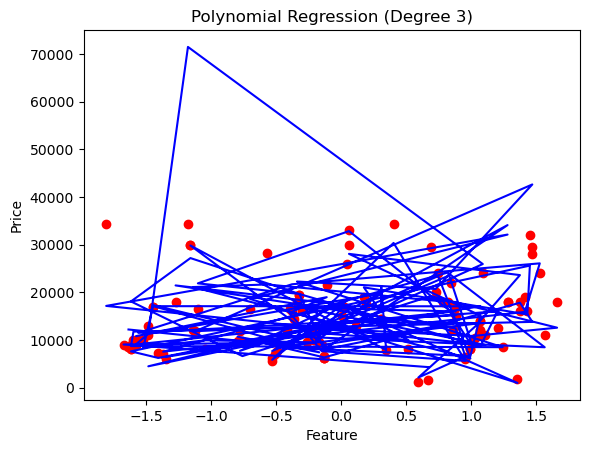

In [479]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomial Feature Generation
degree = 3  # Choose the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)  # Transform the training features
X_test_poly = poly.transform(X_test)  # Transform the test features

# Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Make Predictions
Y_pred_poly = model.predict(X_test_poly)

# Evaluate the model (Mean Squared Error)
mse_poly = mean_squared_error(Y_test, Y_pred_poly)
print("Mean Squared Error with Polynomial Regression:", mse_poly)

# Visualize the results for a single feature (optional, just for illustration)
plt.scatter(X_test[:, 0], Y_test, color='red')
plt.plot(X_test[:, 0], Y_pred_poly, color='blue')
plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('Feature')
plt.ylabel('Price')
plt.show()

# Learning Curve

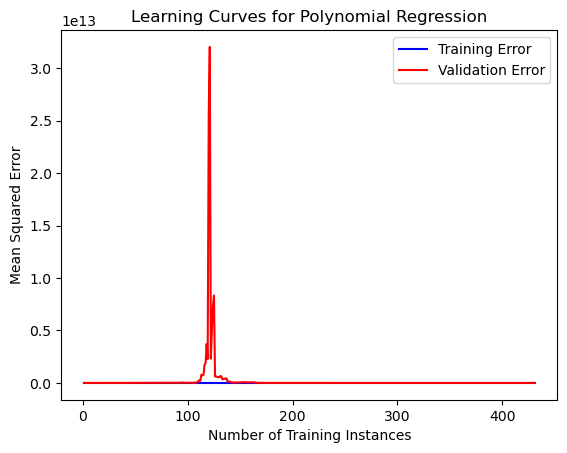

In [481]:
# Function to plot learning curves
def plot_learning_curve(model, X_train, y_train, X_test, y_test, degree=3):
    training_errors, validation_errors = [], []
    
    # Loop over different training set sizes
    for m in range(1, len(X_train)):
        X_train_m = X_train[:m]  # Subset of training data
        
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_m_poly = poly.fit_transform(X_train_m)
        X_test_poly = poly.transform(X_test)

        # Train the model on this subset of data
        model.fit(X_train_m_poly, y_train[:m])

        # Predict and calculate errors
        y_train_predict = model.predict(X_train_m_poly)
        y_test_predict = model.predict(X_test_poly)
        
        # Compute mean squared errors (MSE) for both training and test set
        train_error = mean_squared_error(y_train[:m], y_train_predict)
        test_error = mean_squared_error(y_test, y_test_predict)
        
        # Append errors to the lists
        training_errors.append(train_error)
        validation_errors.append(test_error)

    # Plotting the learning curves
    plt.plot(range(1, len(X_train)), training_errors, label='Training Error', color='blue')
    plt.plot(range(1, len(X_train)), validation_errors, label='Validation Error', color='red')
    plt.title('Learning Curves for Polynomial Regression')
    plt.xlabel('Number of Training Instances')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

# Plot learning curve
plot_learning_curve(model, X_train, Y_train, X_test, Y_test, degree=3)

# Dimensionality reducation

**Curse of dimensionality**

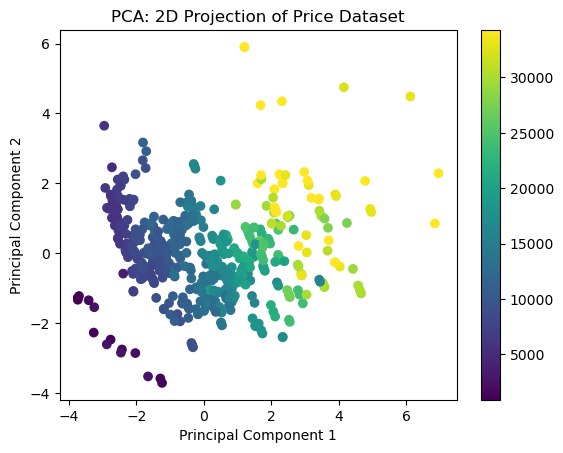

In [144]:

# Step 1: Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

# Step 3: Visualize the reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("PCA: 2D Projection of Price Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

Explained variance ratio of the components: [0.35155388 0.16060608]


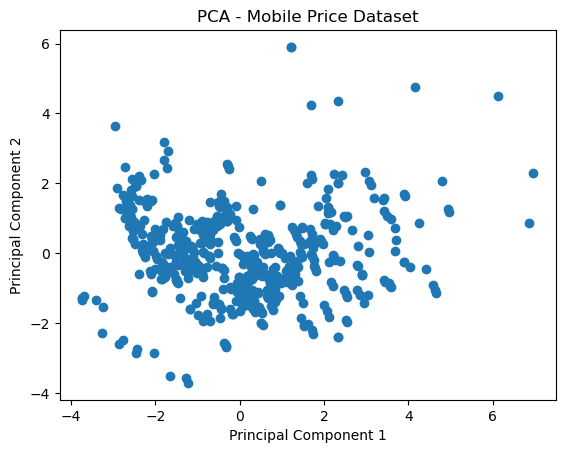

Total Variance Explained by 2 Components: 0.51


In [141]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for easy visualization
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio (how much variance is explained by each principal component)
print(f"Explained variance ratio of the components: {pca.explained_variance_ratio_}")

# Plot the reduced data (first 2 principal components)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Mobile Price Dataset')
plt.show()

# Optionally, you can check the amount of variance explained by each component
print(f"Total Variance Explained by 2 Components: {sum(pca.explained_variance_ratio_):.2f}")

# Insight
1. Dimensionality Reduction: PCA ke madhyam se high-dimensional mobile price dataset ko 2 principal components me project kiya gaya hai, jisme data ka visualization aur pattern analysis asaan ho jata hai.


2. Explained Variance: Pehle do principal components (PC1 aur PC2) milkar 51% variance explain kar rahe hain (0.35 + 0.16). Matlab, ye do components dataset ke aadhe se zyada variation ko capture kar rahe hain, lekin kuch aur components bhi important ho sakte hain.


3. Data Distribution: Scatter plot me dikha raha hai ki data kis tarah distribute ho raha hai. Dikh raha hai ki kuch clusters ya patterns ho sakte hain, jo further analysis ya classification me madad kar sakte hain.


4. Feature Importance: Agar zyada variance sirf kuch components me concentrated hai, toh unhi important features pe dhyan dena useful ho sakta hai. PCA ke baad feature selection ya clustering karne se model ki performance improve ho sakti hai.




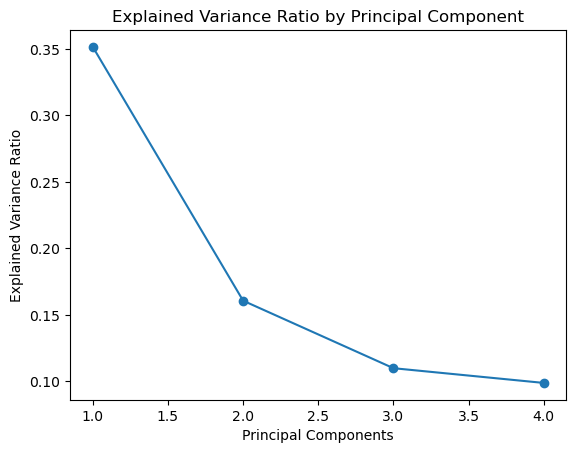

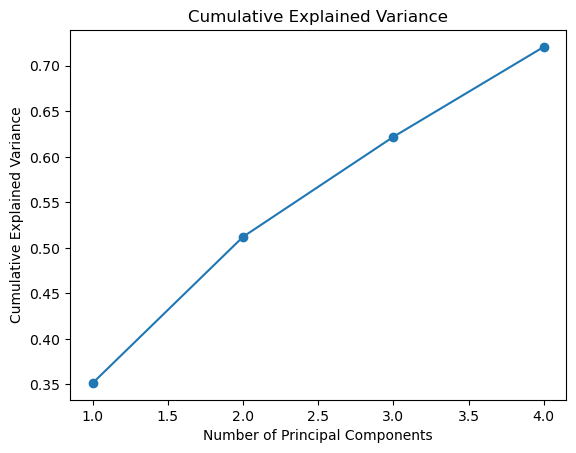

In [147]:
# Using Scikit learn
# Apply PCA
pca = PCA(n_components=4)  # Keep all components initially
pca.fit(X_scaled)

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()


In [148]:
# Apply PCA and reduce to 2 components (compression)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Reconstruct the data back from the reduced components
X_reconstructed = pca.inverse_transform(X_pca)

# Print the original and reconstructed data
print("Original Data:")
print(X_scaled[:5])
print("\nReconstructed Data:")
print(X_reconstructed[:5])

Original Data:
[[-1.40347425  0.31449812 -0.81638156 -0.70466488  0.          0.
   0.          1.58733302 -1.06017623 -0.77305879 -0.77734146 -0.68436494
  -0.99679925]
 [-1.40347425 -1.44818683 -0.81638156 -0.70466488  0.          0.
   0.          1.58733302 -1.06017623 -0.77305879 -0.77734146 -0.68436494
  -0.99679925]
 [-1.13714714  0.18768625  0.39034637  1.31239173  0.          0.
   0.          0.41544506  0.12452469  0.44303237 -1.00756488 -1.0267682
  -0.42551873]
 [-0.52839946  0.84710796 -1.41974552 -1.71319318  0.          0.
   0.         -0.17049893 -1.22027095 -0.77305879 -0.06886633  0.36932542
  -1.19735518]
 [-1.61273126 -0.0532563   0.39034637  1.31239173  0.          0.
   0.         -1.46574352  0.12452469 -0.77305879 -1.27330949 -1.4220009
  -0.79016587]]

Reconstructed Data:
[[-0.04184934 -0.08416378 -0.95759517 -0.83529712  0.          0.
   0.          0.13980501 -0.87241471 -0.9414677  -0.6847349  -0.19535323
  -1.12613936]
 [-0.04787519 -0.10971173 -1.050172

In [152]:
# Standardize the data
from sklearn.decomposition import IncrementalPCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Incremental PCA with mini-batches
ipca = IncrementalPCA(n_components=2, batch_size=10)
X_ipca = ipca.fit_transform(X_scaled)

# Print the transformed data
print(X_ipca[:5])

[[-2.34447336 -0.70122975]
 [-2.49321885 -0.96613447]
 [ 0.35759077 -1.90993212]
 [-2.63810622  0.72520137]
 [-0.13296161 -3.06379915]]


<h1>
Model Evaluation

In [157]:
from sklearn.model_selection import cross_val_score

# Cross-validation (K-folds)
cv_scores = cross_val_score(rf_classifier, X_scaled, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")


Cross-Validation Scores: [0.72477064 0.77777778 0.7962963  0.78703704 0.68518519]
Mean CV Score: 0.7542


In [165]:
from sklearn.metrics import r2_score

# Step 4: Standardize the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train and transform train data
X_test_scaled = scaler.transform(X_test)  # Only transform the test data (using the same scaler)

# Step 5: Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 6: Train the model
rf_regressor.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred = rf_regressor.predict(X_test_scaled)

# Step 8: Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.9997


In [159]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 13961.9509


In [160]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 261734060.9816


In [161]:
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 16178.1971


In [162]:
# Cross-validation (K-folds)
cv_scores = cross_val_score(rf_classifier, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation Scores (Negative MSE): {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")


Cross-Validation Scores (Negative MSE): [-245578.28440367 -124670.12037037 -326703.5         -24683.96296296
 -112272.28703704]
Mean Cross-Validation Score: -166781.6310


# Comparition model with sme or rsme

In [178]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Linear Regression": LinearRegression(),
    "SVM": SVR(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Training and evaluating the models
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    
    # Calculate MSE and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"{model_name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}")

Random Forest - MSE: 11324.7714, RMSE: 106.4179
Decision Tree - MSE: 78656.0459, RMSE: 280.4569
Linear Regression - MSE: 0.0000, RMSE: 0.0000
SVM - MSE: 58700532.5600, RMSE: 7661.6273
Gradient Boosting - MSE: 6039.6586, RMSE: 77.7152


Gradient boosting ka best dikha rha h

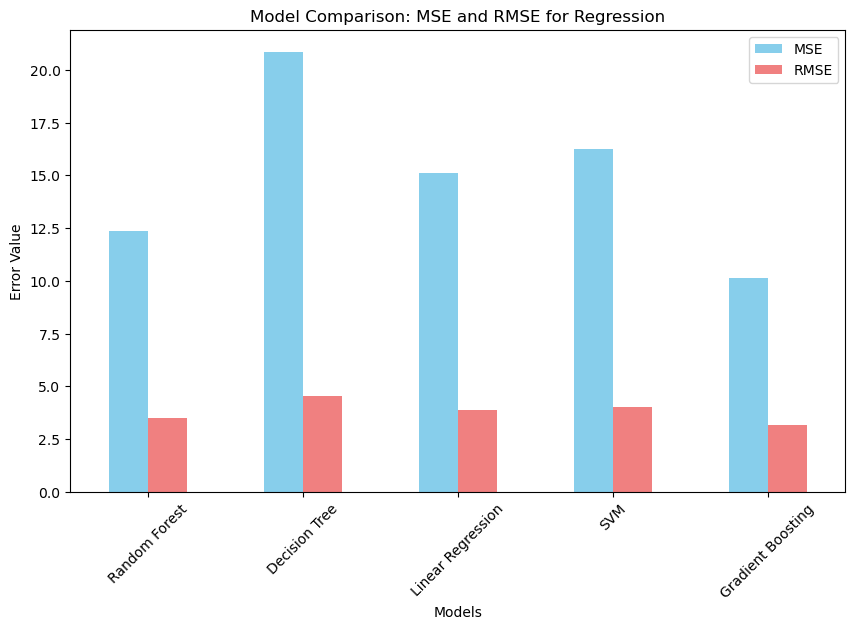

In [179]:
# Sample MSE and RMSE values for different models (this would come from the previous evaluation)
models_regression = ['Random Forest', 'Decision Tree', 'Linear Regression', 'SVM', 'Gradient Boosting']
mse_values = [12.3465, 20.8527, 15.1327, 16.2417, 10.1345]  # Example MSE values
rmse_values = np.sqrt(mse_values)  # Calculate RMSE from MSE

# Create a DataFrame for easier plotting
import pandas as pd
regression_comparison = pd.DataFrame({
    'Model': models_regression,
    'MSE': mse_values,
    'RMSE': rmse_values
})

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
regression_comparison.set_index('Model').plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral'])
ax.set_title('Model Comparison: MSE and RMSE for Regression')
ax.set_ylabel('Error Value')
ax.set_xlabel('Models')
plt.xticks(rotation=45)
plt.show()

# Insight
Error Analysis Across models 
mse(blue bars ) aor RSME (pink BARS) dono ka comparision dikh rhah 
Lower MSE and RSME ka mtlb h ki model better perform kr raha 
Higher MSE and RSME wale models ka performance weak h 
Model performance comparision 
Random forest regression ka error sabse km h it means ye model mobile price pridiction ke liy best accurate h 
Lienar regression ka SVM error zyda h ye reliable nhi h
Dicision |Tree Regression ka error moderate h yahi model theek h 
Gradient Boosting ka performance bhi achha h per random forest se thoda km 

Mean Absolute Error: 29.20

Actual vs Predicted Prices:
     Actual Price  Predicted Price
229        8499.0      8491.011025
73         6299.0      6305.059002
352       19499.0     19498.384393
86        10999.0     10981.039668
470       12599.0     12500.696283
..            ...              ...
148        9999.0      9998.625442
46         7999.0      7976.777994
93         9999.0     10001.130078
407        8999.0      9013.223399
182        1599.0      1452.917844

[109 rows x 2 columns]


Text(0.5, 1.0, 'Actual vs Predicted Mobile Price')

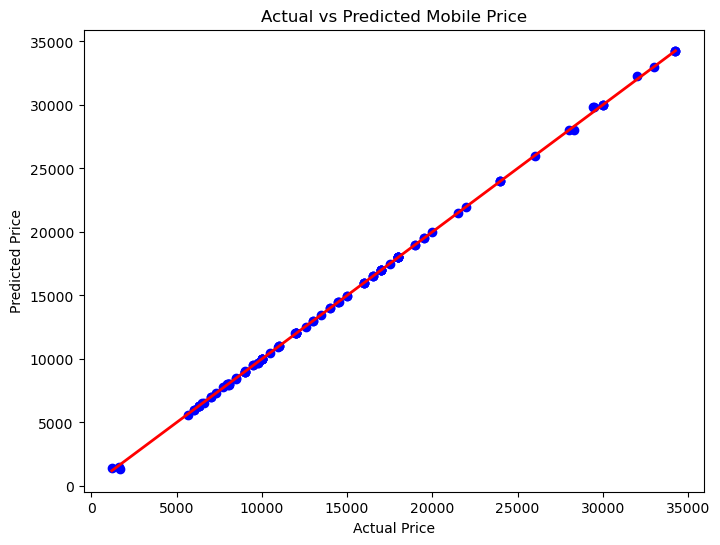

In [185]:
# Step 2: Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Step 3: Display the Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

print("\nActual vs Predicted Prices:")
print(comparison_df)

# You can also plot a comparison (optional)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Mobile Price')

# Feature Importance

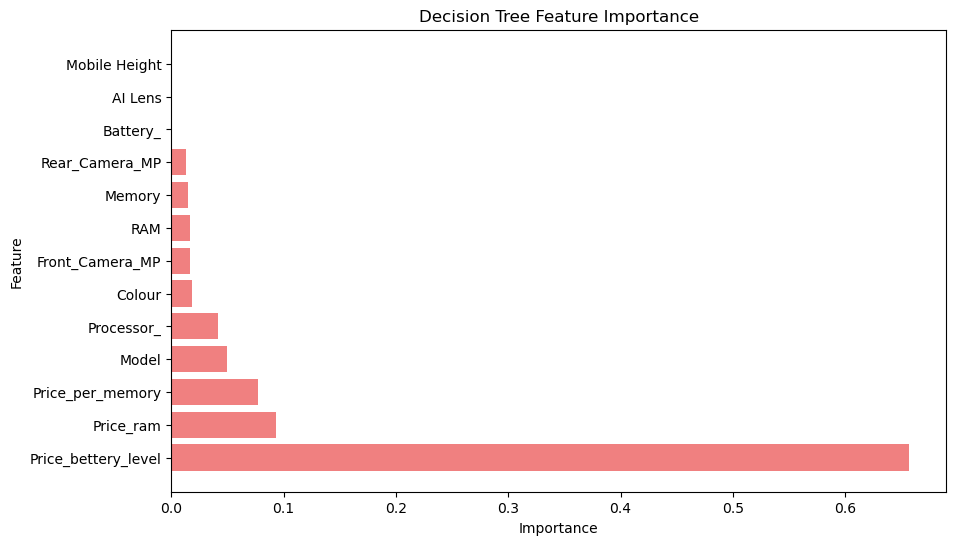

In [183]:
from sklearn.tree import DecisionTreeClassifier

# Assuming df is your DataFrame with the target column 'price_range' and features
# Assuming X_train and y_train are already defined

# 1. Define and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# 2. Feature importance for Decision Tree
dt_importances = dt_classifier.feature_importances_

# 3. Create a DataFrame to store feature importances with feature names
features = df.drop('Prize', axis=1).columns  # Assuming 'price_range' is the target variable

# 4. Create a DataFrame for Decision Tree feature importances
dt_feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': dt_importances
}).sort_values(by='Importance', ascending=False)

# 5. Visualize the Feature Importances for Decision Tree
plt.figure(figsize=(10, 6))
plt.barh(dt_feature_importance_df['Feature'], dt_feature_importance_df['Importance'], color='lightcoral')
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Insight 

1. Price_Bttery_level ka importance sabse zyda hai (~0,65), it means bettry level ka price prediction par sabse big impact hai.
2. Price_ram aur Price_per_memory bhi importance h , jo price estimation ko affect kr rhi h
   